# EDA LOAN CASE STUDY

<b>Problem Statement :</b> Understand how the bank approves and refuses loan. Find out different patterns and represent the outcomes to help the bank reduce the credit risk and interest risk.

In [412]:
#importing warning to remove the warnins
import warnings
warnings.filterwarnings('ignore')

In [413]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Working on Current Application

In [414]:
#reading the application_data 
current_application_data = pd.read_csv('application_data.csv')

In [415]:
current_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [416]:
#Checking number of rows and columns in the current_application_data dataframe
current_application_data.shape

(307511, 122)

In [418]:
# check the column-wise info of the dataframe

current_application_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [419]:
# Check the summary for the numeric columns 

current_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

## <font color = green> Cleaning Data </font>

In [420]:
# Finding columns containing null values

null_columns = current_application_data.columns[current_application_data.isnull().any()]

In [421]:
#Calculating total columns having null values using len()

len(null_columns)

67

In [422]:
#Prining name of columns having null values
null_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [423]:
#calculating percentage of null value
null_value_percent = current_application_data[null_columns].isnull().sum().sort_values()*100/len(current_application_data)

In [424]:
print(null_value_percent)

DAYS_LAST_PHONE_CHANGE       0.000325
CNT_FAM_MEMBERS              0.000650
AMT_ANNUITY                  0.003902
AMT_GOODS_PRICE              0.090403
EXT_SOURCE_2                 0.214626
                              ...    
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
Length: 67, dtype: float64


In [425]:
#Finding the columns having more than 45% null values
missing_column_45 = null_value_percent[null_value_percent>45].sort_values(ascending=False)

In [426]:
missing_column_45

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

In [427]:
len(missing_column_45)

49

<b><font color = blue> Inference </font></b>: There are total 49 cloumns containing more than 45% null values. These columns can be removed as it it not feasible to impute missing values for these cloumns.

In [428]:
#shape before removing the columns
current_application_data.shape

(307511, 122)

In [429]:
# Removing the column containg more than 45% of null value

current_application_data.drop(columns = missing_column_45.index,inplace = True)

In [430]:
#shape after removing the columns
current_application_data.shape

(307511, 73)

Now we are left with 73 columns. We'll analyse the each column containing the percentange of null value less than 15%.

In [431]:
# Finding the columns containing missing values less than 15%
missing_column_15 = null_value_percent[null_value_percent<15]

In [432]:
missing_column_15

DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [433]:
#Analyse AMT_REQ_CREDIT_BUREAU_WEEK column in the dataframe for missing values
current_application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [434]:
#null value in AMT_REQ_CREDIT_BUREAU_WEEK

current_application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

<b><font color = blue> Inference </font></b>:AMT_REQ_CREDIT_BUREAU_WEEK column has 13.50% null values. These null values can be imputed with the median value i.e 0

In [435]:
#Fill Null values in AMT_REQ_CREDIT_BUREAU_WEEK with 0
current_application_data.loc[current_application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(),'AMT_REQ_CREDIT_BUREAU_WEEK'] = current_application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()

In [436]:
#null value in AMT_REQ_CREDIT_BUREAU_WEEK
current_application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [437]:
#null value before removing for AMT_REQ_CREDIT_BUREAU_MON
current_application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [438]:
#Analyse AMT_REQ_CREDIT_BUREAU_MON column in the dataframe for missing values
current_application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<b><font color = blue> Inference </font></b>:AMT_REQ_CREDIT_BUREAU_MON column has 13.50% null values. These null values can be imputed with the median value i.e 0

In [439]:
#Fill Null values in AMT_REQ_CREDIT_BUREAU_MON with 0
current_application_data.loc[current_application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull(),'AMT_REQ_CREDIT_BUREAU_MON'] = current_application_data['AMT_REQ_CREDIT_BUREAU_MON'].median()

In [440]:
#null value after removing for AMT_REQ_CREDIT_BUREAU_MON
current_application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [441]:
#null value before removing for AMT_REQ_CREDIT_BUREAU_DAY
current_application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [442]:
#Analyse AMT_REQ_CREDIT_BUREAU_DAY column in the dataframe for missing values

current_application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<b><font color = blue> Inference </font></b>:AMT_REQ_CREDIT_BUREAU_DAY column has 13.50% null values. These null values can be imputed with the median value i.e 0

In [443]:
#Fill Null values in AMT_REQ_CREDIT_BUREAU_DAY with 0
current_application_data.loc[current_application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(),'AMT_REQ_CREDIT_BUREAU_DAY'] = current_application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()

In [444]:
#null value after removing for AMT_REQ_CREDIT_BUREAU_DAY
current_application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [445]:
#null value before removing for AMT_REQ_CREDIT_BUREAU_HOUR
current_application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [446]:
#Analyse AMT_REQ_CREDIT_BUREAU_HOUR column in the dataframe for missing values

current_application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<b><font color = blue> Inference </font></b>: AMT_REQ_CREDIT_BUREAU_HOUR column has 13.50% null values. These null values can be imputed with the median value i.e 0 as median and 50% quantile is nearly in the same range.

In [447]:
#Fill Null values in AMT_REQ_CREDIT_BUREAU_HOUR with 0
current_application_data.loc[current_application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR'] = current_application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()

In [448]:
#null value after removing for AMT_REQ_CREDIT_BUREAU_HOUR
current_application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [449]:
#null value before removing for AMT_REQ_CREDIT_BUREAU_QRT
current_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [450]:
#Analyse AMT_REQ_CREDIT_BUREAU_QRT column in the dataframe for missing values

current_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<b><font color = blue> Inference </font></b>: AMT_REQ_CREDIT_BUREAU_QRT column has 13.50% null values. These null values can be imputed with the median value i.e 0 as median and 50% quantile is nearly in the same range

In [451]:
#Fill Null values in AMT_REQ_CREDIT_BUREAU_QRT with 0
current_application_data.loc[current_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull(),'AMT_REQ_CREDIT_BUREAU_QRT'] = current_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()

In [452]:
#null value after removing for AMT_REQ_CREDIT_BUREAU_QRT
current_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [453]:
#null value before removing for AMT_REQ_CREDIT_BUREAU_YEAR
current_application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [454]:
#Analyse AMT_REQ_CREDIT_BUREAU_YEAR column in the dataframe for missing values

current_application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<b><font color = blue> Inference </font></b>: AMT_REQ_CREDIT_BUREAU_YEAR column has 13.50% null values. These null values can be imputed with the median value i.e 1 as median and 50% quantile is nearly in the same range.

In [455]:
#Fill Null values in AMT_REQ_CREDIT_BUREAU_DAY with 1
current_application_data.loc[current_application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull(),'AMT_REQ_CREDIT_BUREAU_YEAR'] = current_application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

In [456]:
#null value before after for AMT_REQ_CREDIT_BUREAU_YEAR
current_application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

<b> Checking Columns containing more than 15% null value </b>

In [457]:
#Finding columns having null values more than 15%
null_value_percent[null_value_percent>15]

EXT_SOURCE_3                    19.825307
OCCUPATION_TYPE                 31.345545
EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
HOUSETYPE_MODE                  50.176091
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MODE                 50.193326
LIVINGAREA_MEDI                 50.193326
ENTRANCES_MEDI                  50.348768
ENTRANCES_AVG                   50.348768
ENTRANCES_MODE                  50.348768
APARTMENTS_AVG                  50.749729
APARTMENTS_MODE                 50.749729
APARTMENTS_MEDI                 50.749729
WALLSMATERIAL_MODE              50.840783
ELEVATORS_AVG                   53.295980
ELEVATORS_MEDI                  53.295980
ELEVATORS_MODE                  53

<b> We can fill the null value for OCCUPATION_TYPE based on Income </b>

In [458]:
#Finding number of null values in OCCUPATION_TYPE column

current_application_data['OCCUPATION_TYPE'].isnull().sum()

96391

In [459]:
current_application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<b><font color = blue> Inference </font></b>: We are filling null value as per income . If the income is more than 1 Lakh then it is <b>Managers</b>  else  <b>Laborers

In [460]:
#filling null value based on income
current_application_data['OCCUPATION_TYPE'].fillna(current_application_data['AMT_INCOME_TOTAL'].apply(lambda x:'Managers' if x >=100000 else 'Laborers'),inplace=True)

In [461]:
current_application_data['OCCUPATION_TYPE'].value_counts()

Managers                 90551
Laborers                 82397
Sales staff              32102
Core staff               27570
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [462]:
current_application_data['OCCUPATION_TYPE'].isnull().sum()

0

We can fill the null value for AMT_ANNUITY 

In [463]:
#null value before filling
current_application_data['AMT_ANNUITY'].isnull().sum()

12

In [464]:
current_application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<b><font color = blue> Inference </font></b>: We can see the median value as 24903 so we are filling the null value.

In [465]:
current_application_data.loc[current_application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=current_application_data['AMT_ANNUITY'].median()

In [466]:
#null value after filling
current_application_data['AMT_ANNUITY'].isnull().sum()

0

In [467]:
current_application_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [468]:
current_application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<b><font color = blue> Inference </font></b>: We are filling the null value for good price as median as both median and 50% are nearly same.

In [469]:
current_application_data.loc[current_application_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=current_application_data['AMT_GOODS_PRICE'].median()

In [470]:
current_application_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [471]:
# Fnd the number of null values in NAME_TYPE_SUITE column
current_application_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [472]:
current_application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [473]:
current_application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<b><font color = blue> Inference </font></b>: We have more numbers of  <b>Unaccompanied</b> so we are filling the null values with it.

In [474]:
current_application_data.loc[current_application_data['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']= 'Unaccompanied'

In [475]:
current_application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [476]:
current_application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [477]:
current_application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<b><font color = blue> Inference </font></b>: We can see the mean and 50% (median) is almost same [2]  . We are filling null values with <b>2

In [478]:
current_application_data.loc[current_application_data['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=current_application_data['CNT_FAM_MEMBERS'].median()

In [479]:
# Find the number of null values in CNT_FAM_MEMBERS column
current_application_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [480]:
current_application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [481]:
# Find the number of null values in DAYS_LAST_PHONE_CHANGE column
current_application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [482]:
current_application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [483]:
current_application_data.loc[current_application_data['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE']=current_application_data['DAYS_LAST_PHONE_CHANGE'].median()

In [484]:
current_application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

#### Removing Unwanted Columns

In [485]:
#Listing columns which are not required for the dateframe study
unwanted_columns=['EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

In [486]:
len(unwanted_columns)

32

In [487]:
#Removing unwanted columns from the current_application_data dataframe
current_application_data.drop(labels=unwanted_columns,axis=1,inplace=True)

In [488]:
#Checking shape of current_application_data dataframe after removing unwanted columns
current_application_data.shape

(307511, 41)

<b><font color = green> Insights </font></b>: 
    1. Removed columns having null value percentage more than 45%
    2. Imputed the null values accordingly for columns containing less percentage of null values.
    3. Removed unwanted data from data set.

#### Checking the XNA value from table and fill it as per condition

In [489]:
current_application_data[current_application_data =='XNA'].count()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        4
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [490]:
current_application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


<b><font color = blue> Inference </font></b>: Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [491]:
# Replacing XNA with F
current_application_data.loc[current_application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [492]:
current_application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [493]:
#Checking for organization type
current_application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [494]:
100*(current_application_data['ORGANIZATION_TYPE'].value_counts()/len(current_application_data['ORGANIZATION_TYPE']))

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

<b><font color = blue> Inference </font></b>: XNA having <b>18%</b> and we cant impute as per the condition.So we are removing it

In [495]:
current_application_data = current_application_data.drop(current_application_data.loc[current_application_data['ORGANIZATION_TYPE']=='XNA'].index)

In [496]:
current_application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

#### Converting Negative Values to Positive using absolute values

<b><font color = blue> Inference </font></b>: We can see there are columns having negative values so changing it to absolute values.

In [497]:
current_application_data.DAYS_BIRTH = current_application_data.DAYS_BIRTH.abs()
current_application_data.DAYS_EMPLOYED = current_application_data.DAYS_EMPLOYED.abs()
current_application_data.DAYS_REGISTRATION = current_application_data.DAYS_REGISTRATION.abs()
current_application_data.DAYS_ID_PUBLISH = current_application_data.DAYS_ID_PUBLISH.abs()
current_application_data.DAYS_LAST_PHONE_CHANGE = current_application_data.DAYS_LAST_PHONE_CHANGE.abs()

### Outliers in  current_application_data dataframe

In [498]:
current_application_data['AMT_CREDIT'].describe()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

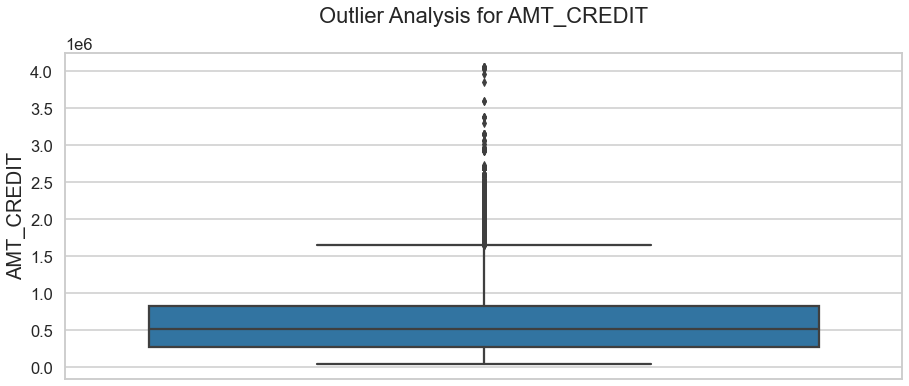

In [499]:
#Analizing the outlier for AMT_CREDIT

plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for AMT_CREDIT')
sns.boxplot(data = current_application_data,y='AMT_CREDIT')
plt.show()

<b><font color = blue> Inference </font></b>: As per the plot there are applicants having credit loan amount more than 3 lakhs. 

In [500]:
current_application_data['AMT_ANNUITY'].describe()

count    252137.000000
mean      27812.186704
std       14647.424282
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

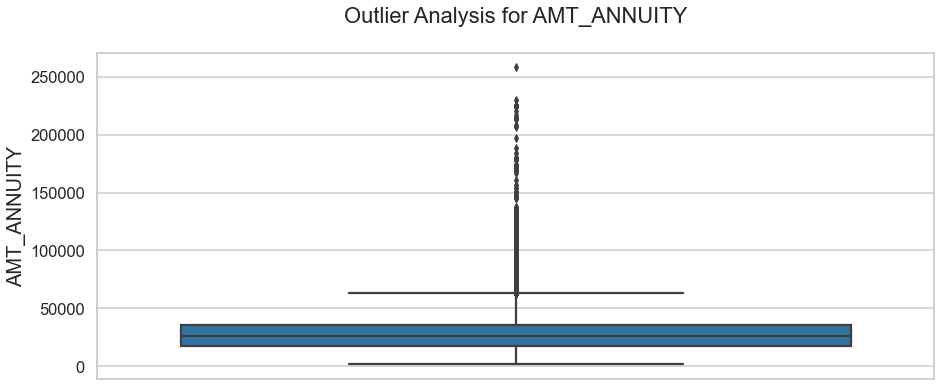

In [501]:
#Analizing the outlier for AMT_ANNUITY

plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for AMT_ANNUITY')
sns.boxplot(data = current_application_data,y='AMT_ANNUITY')
plt.show()

<b><font color = blue> Inference </font></b>: Most of the applicants having annuity amount from 15000 to 40000 but very few are having annuity 25 Lakhs

In [502]:
current_application_data['AMT_INCOME_TOTAL'].describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

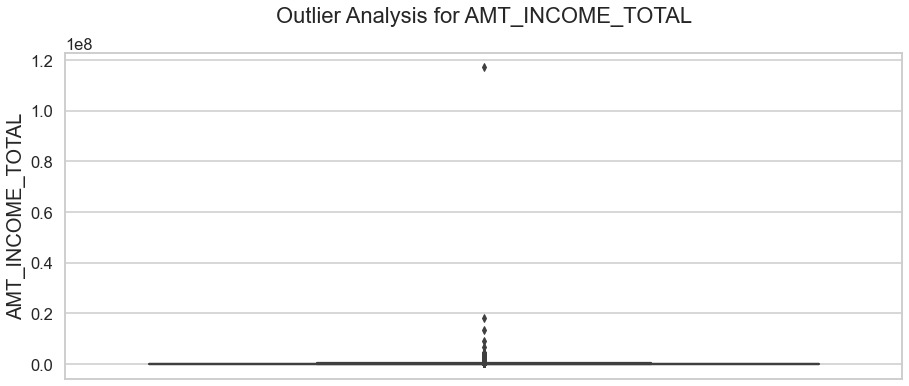

In [503]:
#Analizing the outlier for AMT_INCOME_TOTAL

plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for AMT_INCOME_TOTAL')
sns.boxplot(data = current_application_data,y='AMT_INCOME_TOTAL')
plt.show()

<b><font color = blue> Inference </font></b>: Most of the applicant having the income range of 1 lakhs to 3 lakhs but there is only one applicant having income around <b>11-12Cr</b> so we can consider it as outlier.

In [504]:
current_application_data['AMT_GOODS_PRICE'].describe()

count    2.521370e+05
mean     5.493047e+05
std      3.730924e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

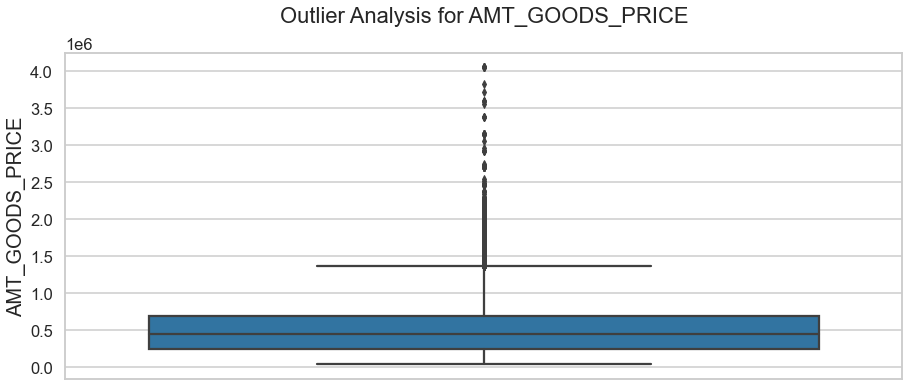

In [505]:
#Analizing the outlier for AMT_GOOD_PRICE

plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for AMT_GOODS_PRICE')
sns.boxplot(data = current_application_data,y='AMT_GOODS_PRICE')
plt.show()

<b><font color = blue> Inference </font></b>: Most of the applicants are having goods price between <b>2-7 Lakhs</b> but some applicants having goods price of 40 Lakhs so it is considered as outliers.

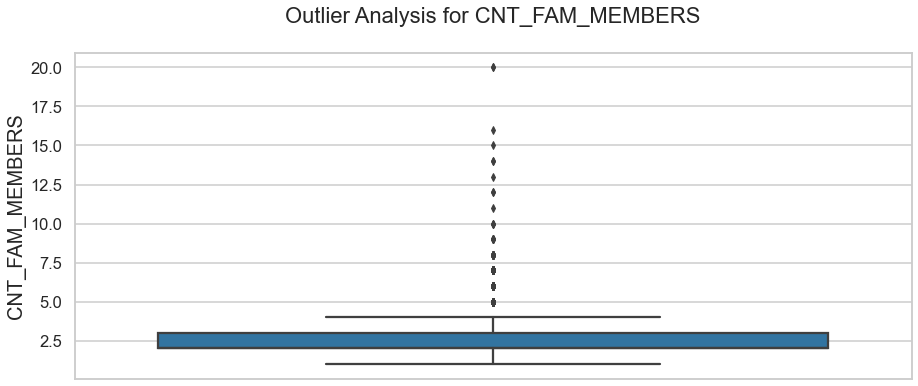

In [506]:
plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for CNT_FAM_MEMBERS')
sns.boxplot(data = current_application_data,y='CNT_FAM_MEMBERS')
plt.show()

<b><font color = blue> Inference </font></b>: Majority of the applicants are having 2-3 Members but in some applicants there are having more than 5 Members and only 1 applicant is having <b>20 Members</b> . So we are considering as outliers.

### Grouping the column based on income, credit, annuity and goods cost

In [507]:
#Grouping the income
income_bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,200000000]
income_slot = ['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000','375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
current_application_data['AMT_INCOME_RANGE'] = pd.cut(current_application_data['AMT_INCOME_TOTAL'],income_bins,labels = income_slot)
current_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0  ...                        0  Business Entity Type 3   
1  ...                        0                  School   
2  ...                        0              Government   
3  ...                        0  Business Entity Type 3   
4  ...                        1                Religion   

  DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                 1134.0                        0.0                       0.0   
1                  828.0                        0.0                       0.0   
2                  815.0                        0.0                       0.0   
3                  617.0                        0.0                       0.0   
4                 1106.0                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_RANGE  
0                        0.0                         1.0     200000-225000  
1                        0.0                         0.0     250000-275000  
2                        0.0                         0.0       50000-75000  
3                        0.0                         1.0     125000-150000  
4                        0.0                         0.0     100000-125000  

[5 rows x 42 columns]

In [508]:
#checking the values of income group
current_application_data['AMT_INCOME_RANGE'].value_counts()

125000-150000       39819
200000-225000       35994
100000-125000       34851
75000-100000        29612
150000-175000       29296
175000-200000       25892
50000-75000         12077
250000-275000       11485
225000-250000        6483
300000-325000        6169
350000-375000        4185
275000-300000        3749
425000-450000        2863
500000 and above     2543
25000-50000          1982
325000-350000        1952
400000-425000        1652
375000-400000        1132
475000-500000         282
450000-475000         119
0-25000                 0
Name: AMT_INCOME_RANGE, dtype: int64

In [509]:
# grouping the credit
credit_bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,4500000]
credit_slots = ['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000 and above']
current_application_data['AMT_CREDIT_RANGE'] = pd.cut(current_application_data['AMT_CREDIT'],credit_bins,labels=credit_slots)
current_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...       ORGANIZATION_TYPE DAYS_LAST_PHONE_CHANGE  \
0  ...  Business Entity Type 3                 1134.0   
1  ...                  School                  828.0   
2  ...              Government                  815.0   
3  ...  Business Entity Type 3                  617.0   
4  ...                Religion                 1106.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_RANGE  \
0                        0.0                         1.0     200000-225000   
1                        0.0                         0.0     250000-275000   
2                        0.0                         0.0       50000-75000   
3                        0.0                         1.0     125000-150000   
4                        0.0                         0.0     100000-125000   

    AMT_CREDIT_RANGE  
0      400000-500000  
1  1000000 and above  
2      100000-200000  
3      300000-400000  
4      500000-600000  

[5 rows x 43 columns]

In [510]:
#checking the values of current group
current_application_data['AMT_CREDIT_RANGE'].value_counts()

1000000 and above    43142
200000-300000        42463
500000-600000        27923
400000-500000        27108
100000-200000        24101
300000-400000        21886
600000-700000        19713
800000-900000        18539
700000-800000        15419
900000-1000000        7575
0-100000              4268
Name: AMT_CREDIT_RANGE, dtype: int64

In [511]:
#grouping the annuity

annuity_bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000]
annuity_slot = ['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','200000-225000','225000-250000']
current_application_data['AMT_ANNUITY_RANGE'] = pd.cut(current_application_data['AMT_ANNUITY'],annuity_bins,labels = annuity_slot)
current_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...                  1134.0                        0.0   
1  ...                   828.0                        0.0   
2  ...                   815.0                        0.0   
3  ...                   617.0                        0.0   
4  ...                  1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_RANGE   AMT_CREDIT_RANGE  \
0                         1.0     200000-225000      400000-500000   
1                         0.0     250000-275000  1000000 and above   
2                         0.0       50000-75000      100000-200000   
3                         1.0     125000-150000      300000-400000   
4                         0.0     100000-125000      500000-600000   

   AMT_ANNUITY_RANGE  
0            0-25000  
1        25000-50000  
2            0-25000  
3        25000-50000  
4            0-25000  

[5 rows x 44 columns]

In [512]:
#checking the values of annuity group
current_application_data['AMT_ANNUITY_RANGE'].value_counts()

0-25000          119984
25000-50000      113301
50000-75000       17109
75000-100000       1313
100000-125000       294
125000-150000        75
200000-225000        31
150000-175000        21
175000-200000         7
225000-250000         1
Name: AMT_ANNUITY_RANGE, dtype: int64

In [513]:
# grouping the good price
goods_price_bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,4500000]
goods_price_slots = ['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000 and above']
current_application_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(current_application_data['AMT_GOODS_PRICE'],goods_price_bins,labels=goods_price_slots)
current_application_data.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         0.0                       0.0   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_RANGE  \
0                       0.0                        1.0     200000-225000   
1                       0.0                        0.0     250000-275000   
2                       0.0                        0.0       50000-75000   
3                       0.0                        1.0     125000-150000   
4                       0.0                        0.0     100000-125000   

    AMT_CREDIT_RANGE  AMT_ANNUITY_RANGE  AMT_GOODS_PRICE_RANGE  
0      400000-500000            0-25000          300000-400000  
1  1000000 and above        25000-50000      1000000 and above  
2      100000-200000            0-25000          100000-200000  
3      300000-400000        25000-50000          200000-300000  
4      500000-600000            0-25000          500000-600000  

[5 rows x 45 columns]

In [514]:
current_application_data['AMT_GOODS_PRICE_RANGE'].value_counts()

200000-300000        49472
400000-500000        48063
600000-700000        32338
1000000 and above    29152
100000-200000        26280
800000-900000        19197
300000-400000        17501
500000-600000        10368
700000-800000         6900
900000-1000000        6480
0-100000              6386
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

### Target Imbalance

In [515]:
current_application_data['TARGET'].value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

In [516]:
current_application_data['TARGET'].value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

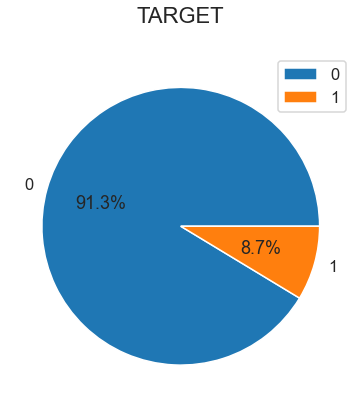

In [517]:
target_labels = [0,1]
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.pie(current_application_data['TARGET'].value_counts(),labels=target_labels,autopct='%.1f%%')
plt.title('TARGET')
ax1.legend(labels= target_labels,loc='upper right')
plt.tight_layout()
plt.show()

<b><font color = blue> Inference </font></b>: <b>91.3%</b> of applicants are not facing difficulties with payment.

In [518]:
current_application_data_target1 = current_application_data.loc[current_application_data['TARGET']==1]

In [519]:
current_application_data_target0 = current_application_data.loc[current_application_data['TARGET']==0]

In [520]:
#Calculating the impurity balance for targets

round(len(current_application_data_target0)/len(current_application_data_target1),2)

10.55

The Imbalance between target 0 and target 1 is <b>10.55

## Plotting the data based on target (0 and 1)

### Univariant plot for target 0

In [521]:
def uniplot_target0(col,title,hue=None):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 25
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 35
    
    data = pd.Series(data=hue)
    fig,ax = plt.subplots()
    width = len(current_application_data_target0[col].unique())+7+4*len(data.unique())
    fig.set_size_inches(width,10)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=current_application_data_target0,x=col,order=current_application_data_target0[col].value_counts().index,hue = hue,palette='rocket')
    
    plt.show()

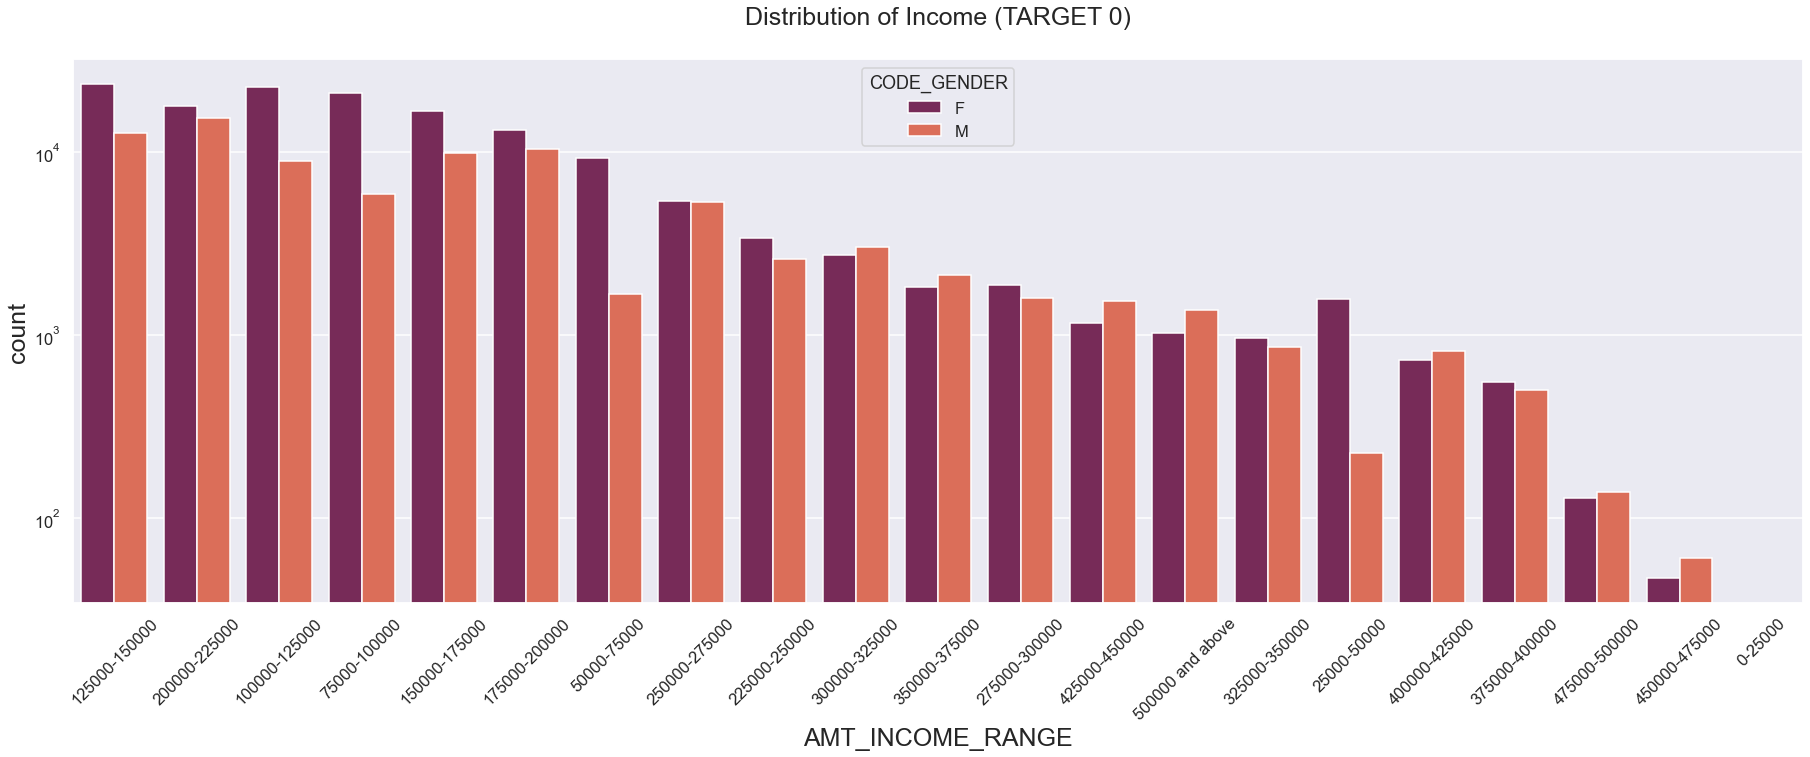

In [522]:
uniplot_target0(col='AMT_INCOME_RANGE',title='Distribution of Income (TARGET 0)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: Female applicates count is more than male applicants count in income range <b>25k-125k</b> whereas Male applicants count is more than female applicates count in income range <b>5 Lakhs and above</b>  

We can see the similar count for Male and Female applicatants in income range <b>2.5L-2.7L</b>

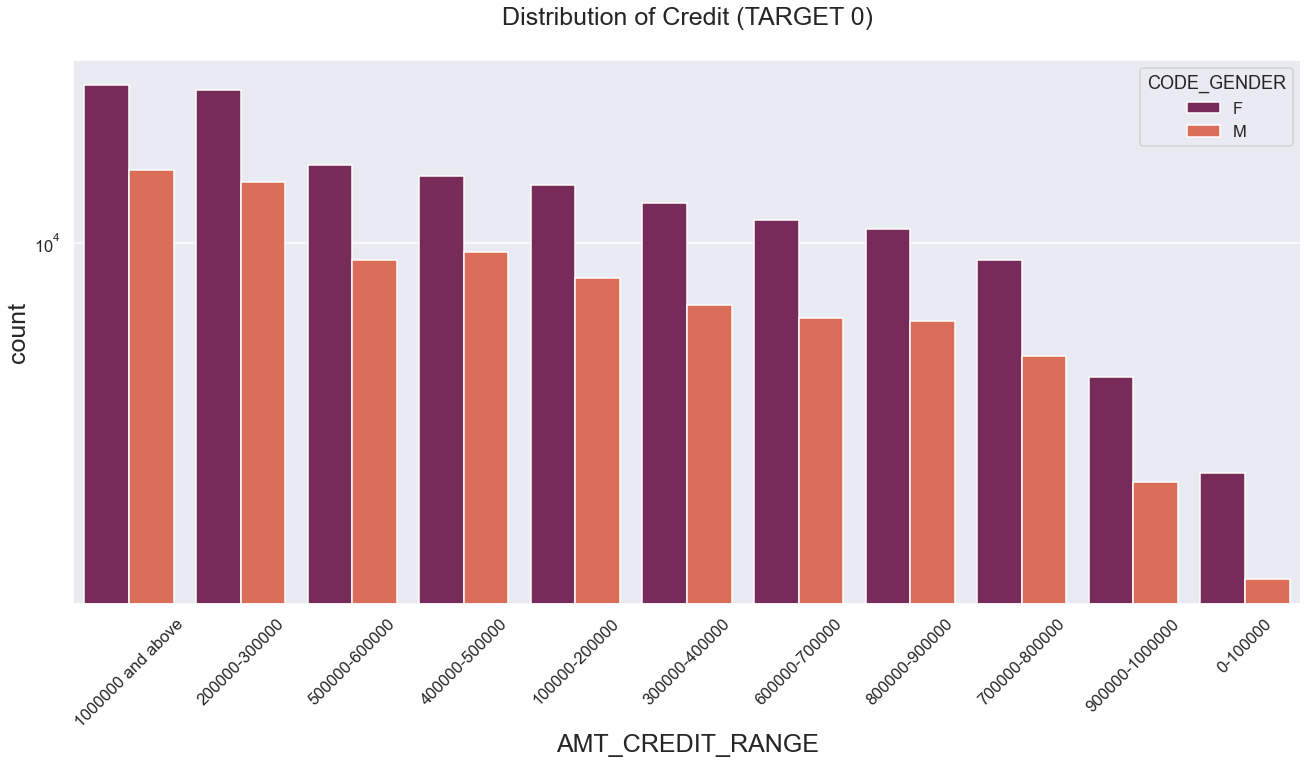

In [523]:
uniplot_target0(col='AMT_CREDIT_RANGE',title='Distribution of Credit (TARGET 0)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: Female applicants count is more than male applicants for all credit amount ranges.

Highest Credit Range : 10 Lakhs and Above

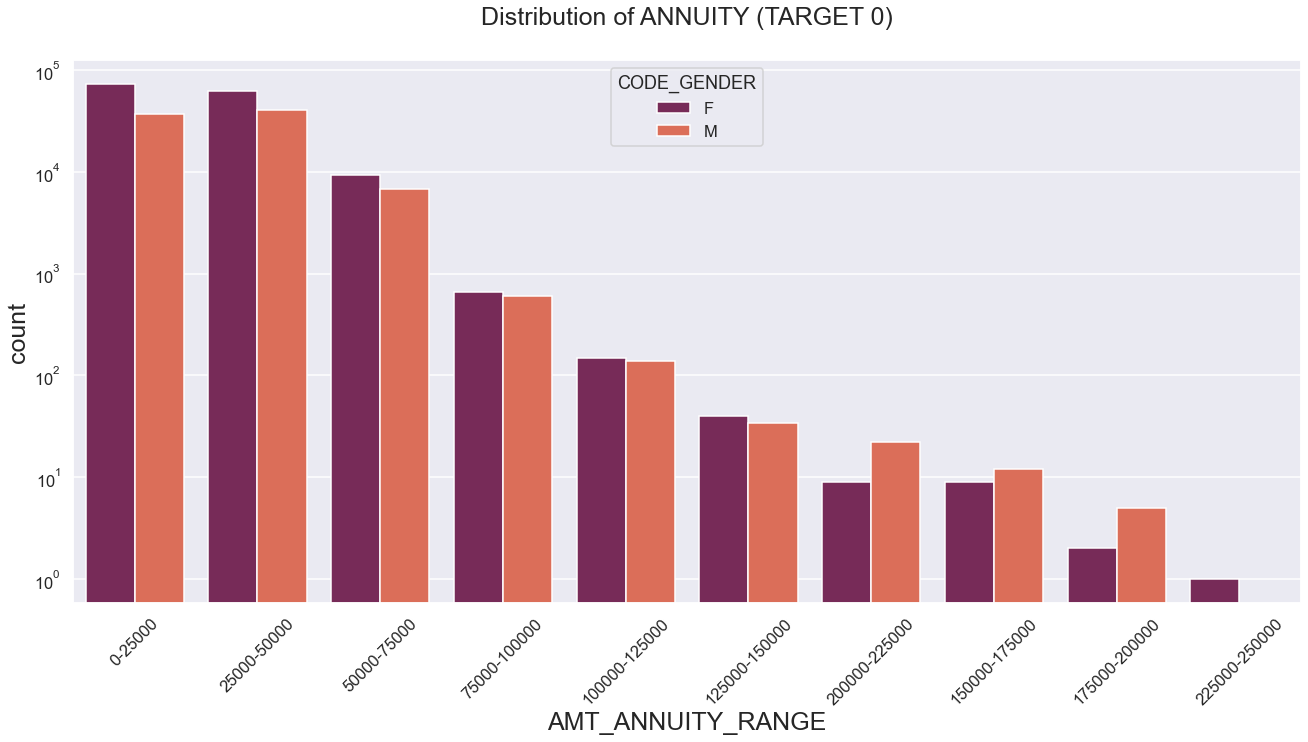

In [524]:
uniplot_target0(col='AMT_ANNUITY_RANGE',title='Distribution of ANNUITY (TARGET 0)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: Most of the male are having greated annuity than female for the range of 1.5 L to 2.25L . 
female applicants are having annuity amount more in the range of 0-1.5L and 2.25L-2.5L than male 

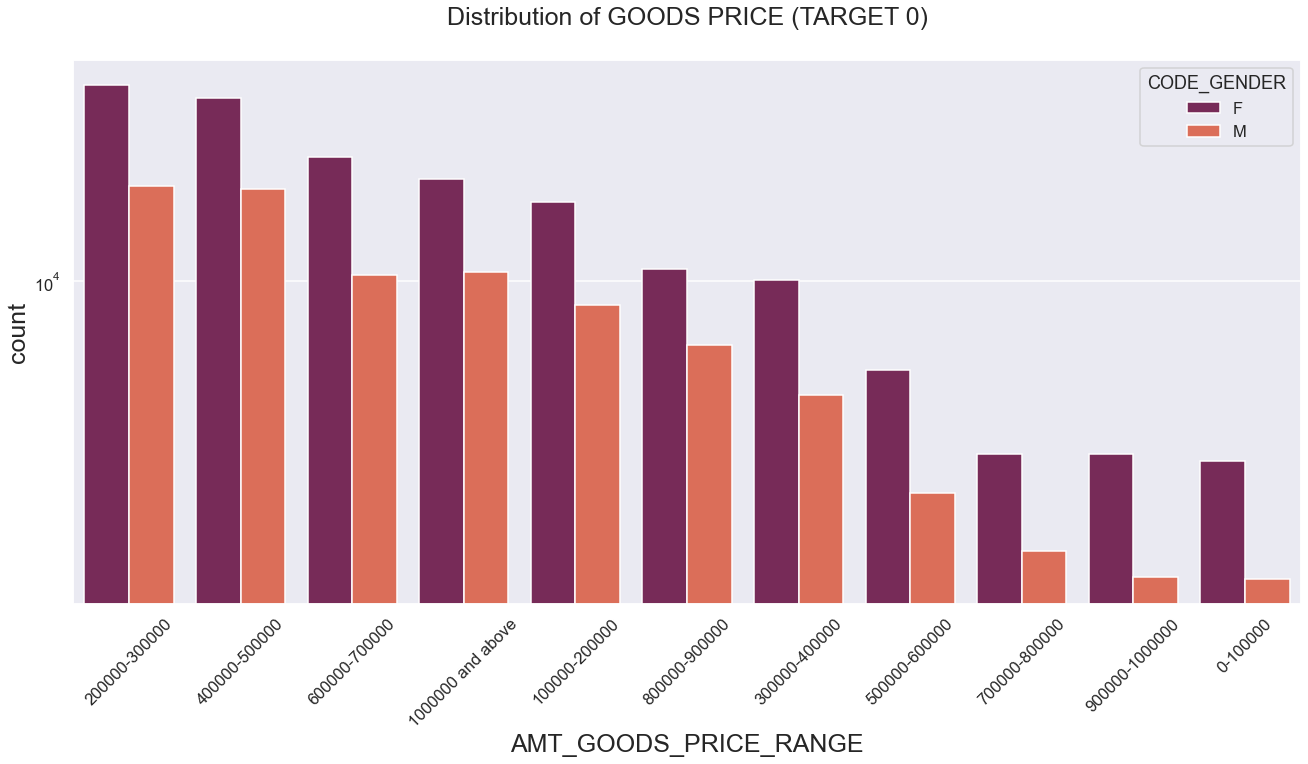

In [525]:
uniplot_target0(col='AMT_GOODS_PRICE_RANGE',title='Distribution of GOODS PRICE (TARGET 0)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: Female Applicants are more than male applicants in all goods price amount range.

Highest Credit Range : 2 lakhs to 3 Lakhs

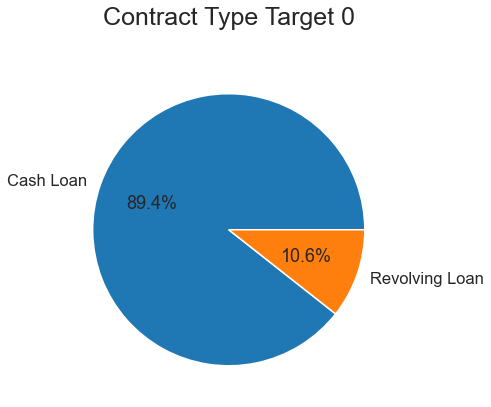

In [526]:
contract_labels_target_0 = ['Cash Loan','Revolving Loan']
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.pie(current_application_data_target0['NAME_CONTRACT_TYPE'].value_counts(),labels=contract_labels_target_0,autopct='%.1f%%')
plt.title('Contract Type Target 0')
plt.tight_layout()
plt.show()

<b><font color = blue> Insights </font></b>: Most of the people prefer for Cash Loans

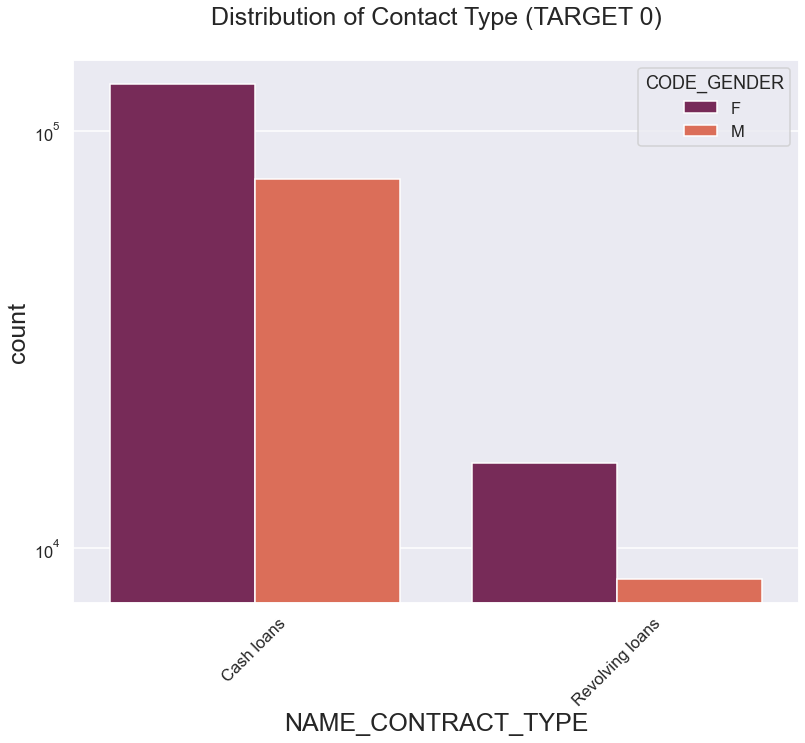

In [527]:
uniplot_target0(col='NAME_CONTRACT_TYPE',title='Distribution of Contact Type (TARGET 0)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: Female applicants has more Cash loans type contract product than males.

In [528]:
100*(current_application_data_target0['NAME_INCOME_TYPE'].value_counts()/len(current_application_data_target0['NAME_INCOME_TYPE']))

Working                 62.331200
Commercial associate    28.769616
State servant            8.881382
Student                  0.007816
Businessman              0.004342
Pensioner                0.004342
Maternity leave          0.001303
Name: NAME_INCOME_TYPE, dtype: float64

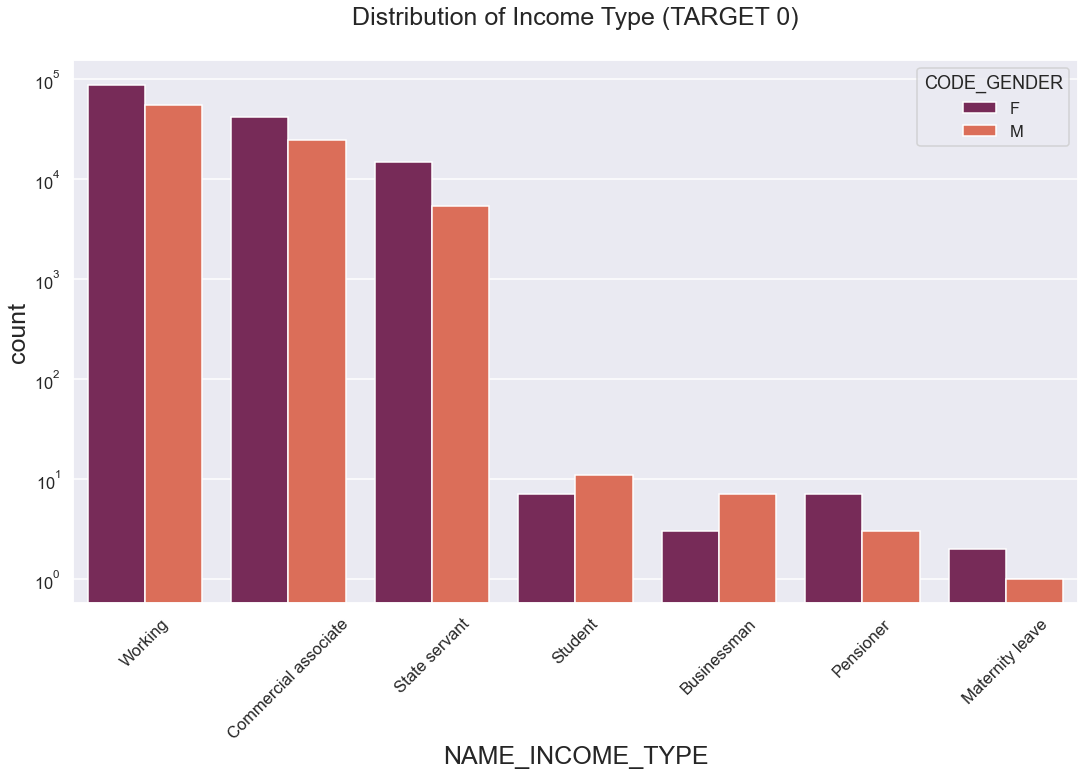

In [529]:
uniplot_target0(col='NAME_INCOME_TYPE',title='Distribution of Income Type (TARGET 0)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: More Female Applicants are in Working.Commercial Associates,State Servants,Pensioners and Maternity Leave whereas More male applicants are in Students and Businessman.

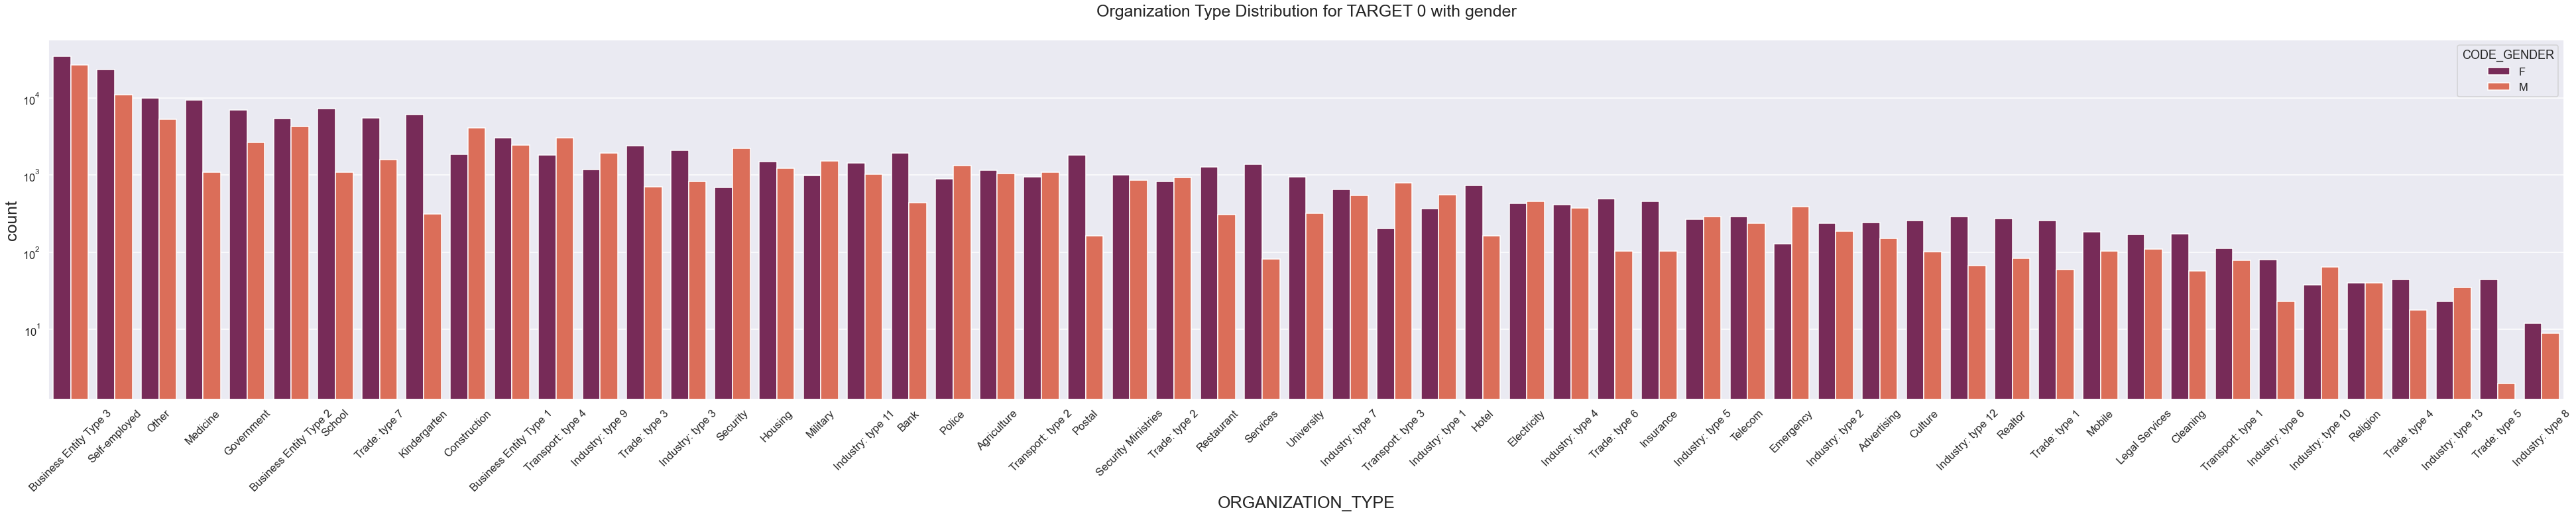

In [530]:
uniplot_target0(col='ORGANIZATION_TYPE',title='Organization Type Distribution for TARGET 0 with gender',hue='CODE_GENDER')

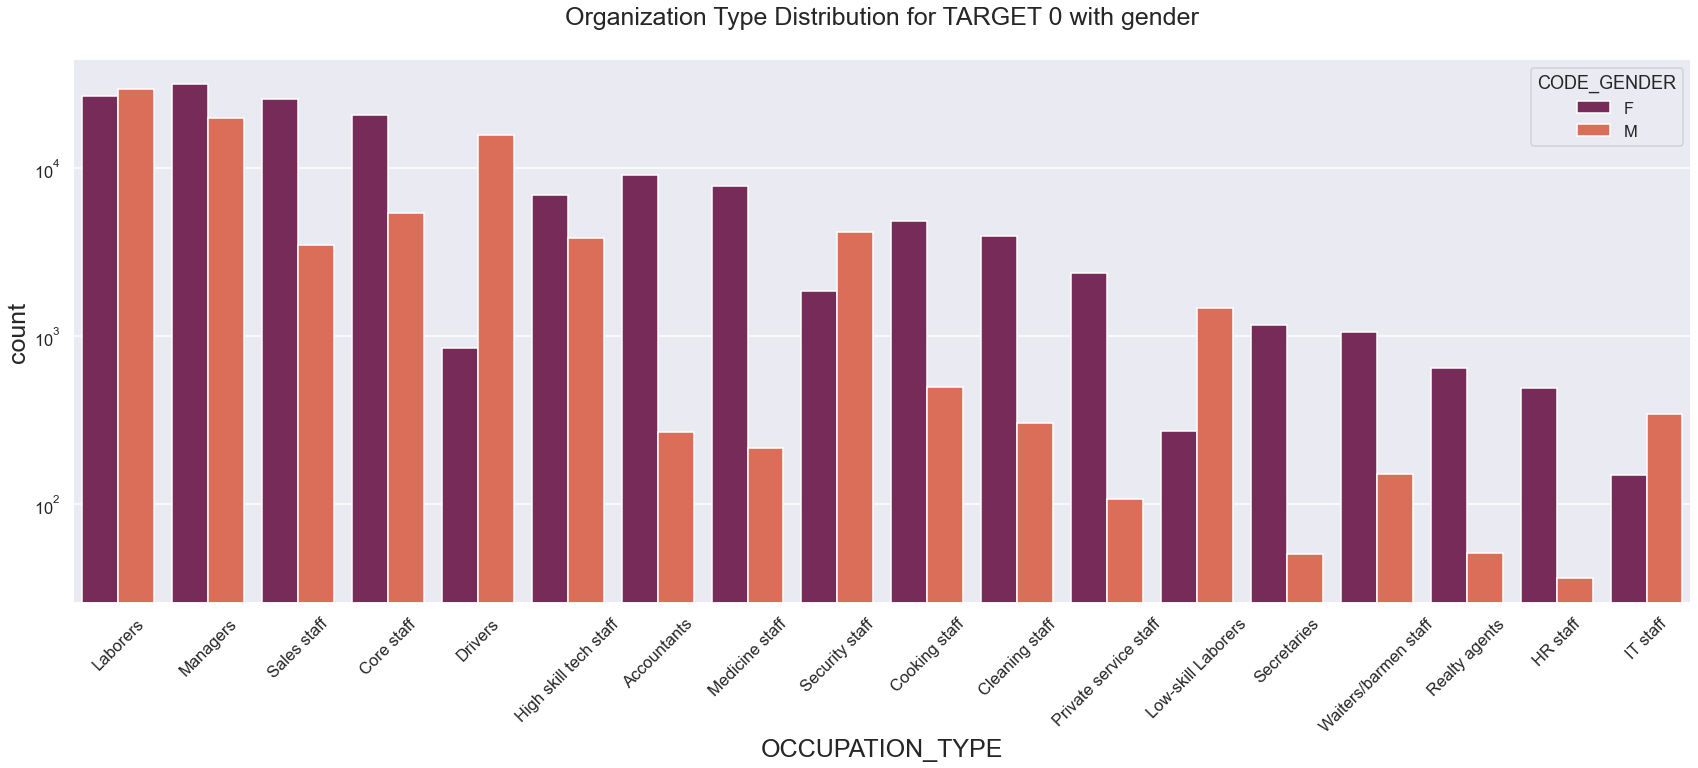

In [531]:
uniplot_target0(col='OCCUPATION_TYPE',title='Organization Type Distribution for TARGET 0 with gender',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: 1. Females applicant count is highest at Manager level.
2. Male labour applicant count is highest  amoung all male applicants.

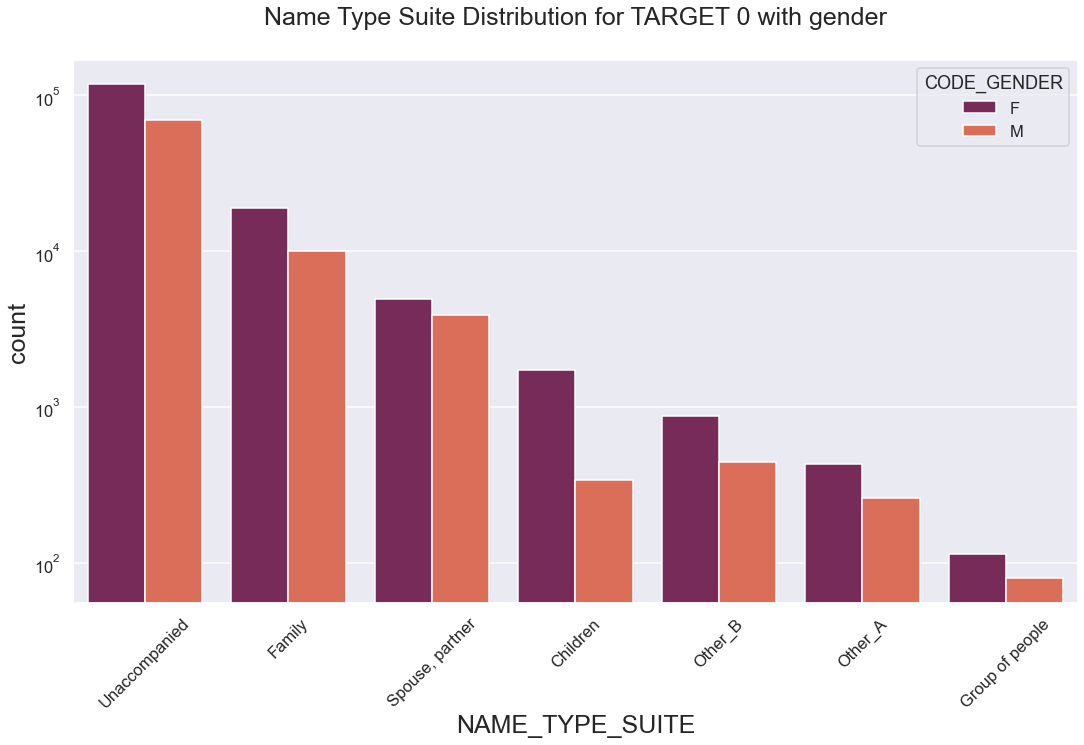

In [532]:
uniplot_target0(col='NAME_TYPE_SUITE',title='Name Type Suite Distribution for TARGET 0 with gender',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>:  More Female applicats than that of males in all name_type_suite.

In [533]:
current_application_data_target0['ORGANIZATION_TYPE'].value_counts()/len(current_application_data_target0['ORGANIZATION_TYPE'])

Business Entity Type 3    0.267774
Self-employed             0.149821
Other                     0.066903
Medicine                  0.045401
Government                0.042023
Business Entity Type 2    0.041915
School                    0.036331
Trade: type 7             0.030790
Kindergarten              0.027772
Construction              0.025775
Business Entity Type 1    0.023869
Transport: type 4         0.021263
Industry: type 9          0.013647
Trade: type 3             0.013595
Industry: type 3          0.012722
Security                  0.012692
Housing                   0.011824
Military                  0.010851
Industry: type 11         0.010725
Bank                      0.010321
Police                    0.009657
Agriculture               0.009540
Transport: type 2         0.008823
Postal                    0.008576
Security Ministries       0.008155
Trade: type 2             0.007673
Restaurant                0.006943
Services                  0.006387
University          

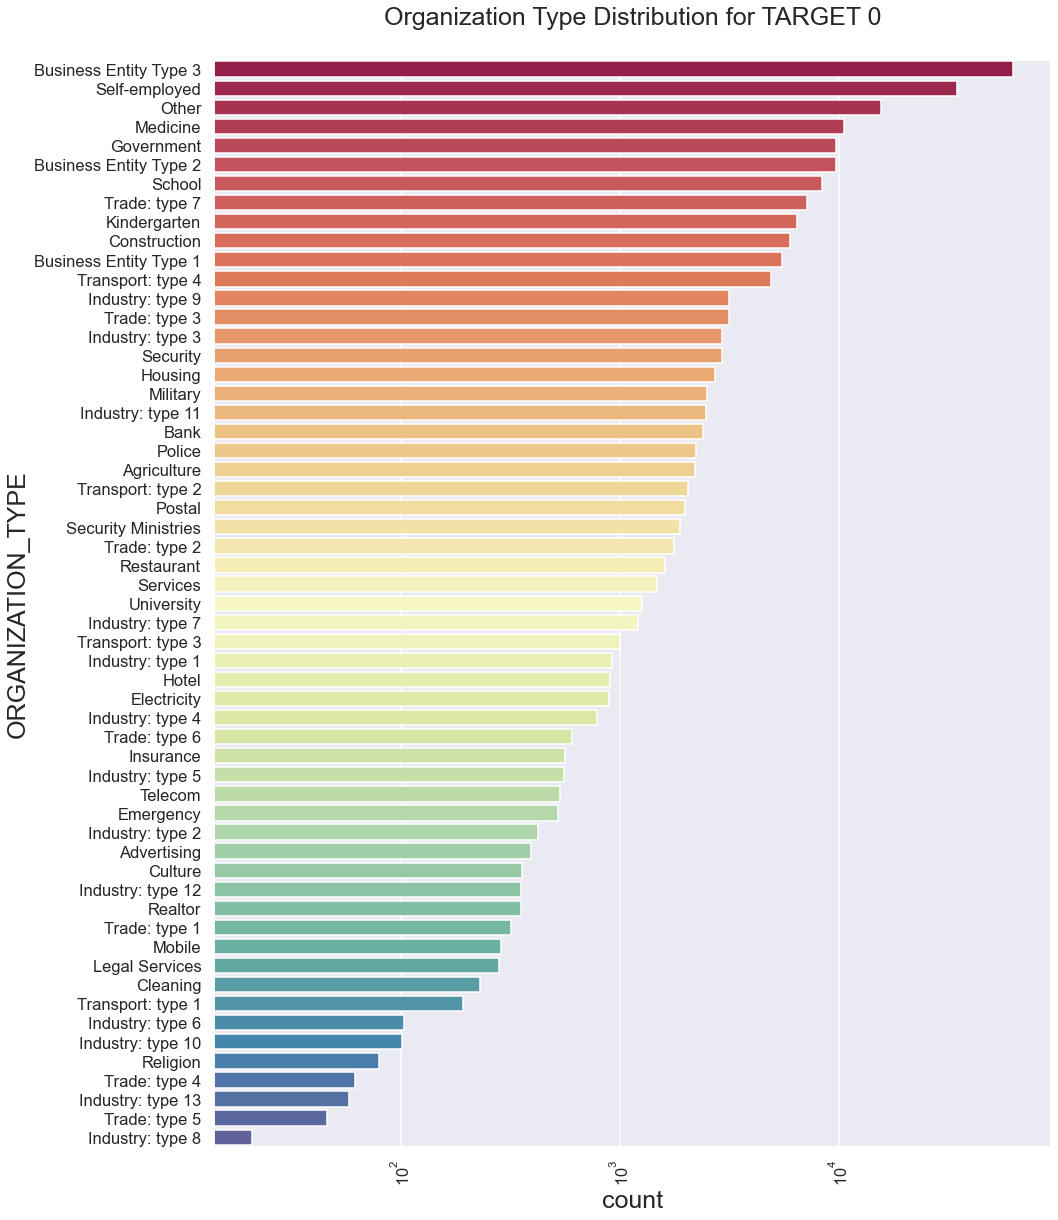

In [534]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 35
plt.xticks(rotation = 90)
plt.xscale('log')
plt.title('Organization Type Distribution for TARGET 0')
sns.countplot(data = current_application_data_target0,y='ORGANIZATION_TYPE',order=current_application_data_target0['ORGANIZATION_TYPE'].value_counts().index,palette='Spectral') 
plt.show()

<b><font color = blue> Insights </font></b>: 1. More loan applicants are from organization type business entity type 3 and self-employed.
2. Very less number of the loan applicants from industry type 8 and trade type 5

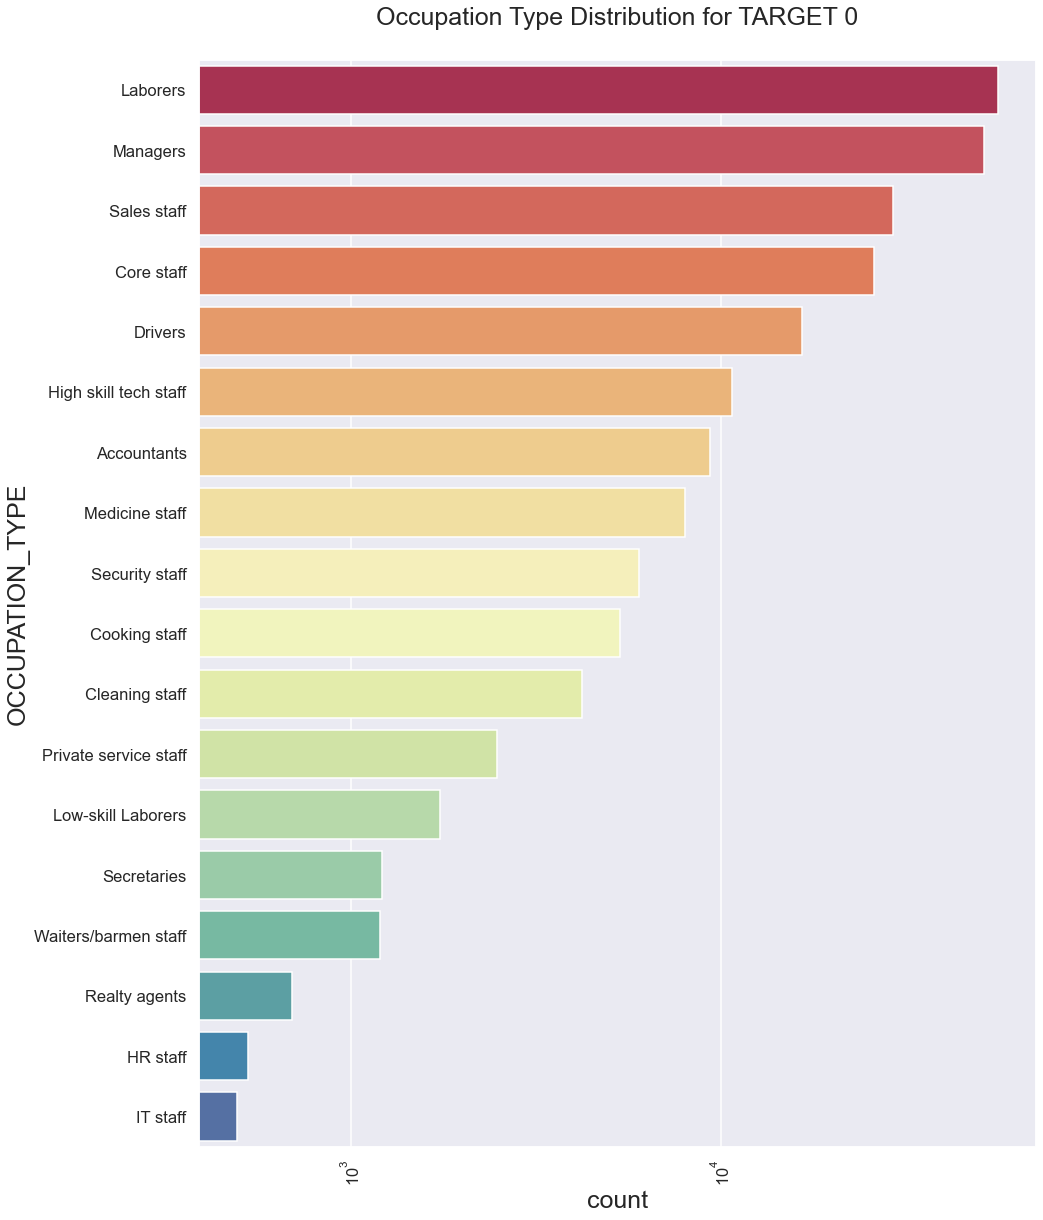

In [535]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 35
plt.xticks(rotation = 90)
plt.xscale('log')
plt.title('Occupation Type Distribution for TARGET 0')
sns.countplot(data = current_application_data_target0,y='OCCUPATION_TYPE',order=current_application_data_target0['OCCUPATION_TYPE'].value_counts().index,palette='Spectral') 
plt.show()

<b><font color = blue> Insights </font></b>: 1. For target 0 most of the loan applicants are having occupation type Laborers.
2. For target 0 very few of the loan applicants are having occupation type IT staff

### Univariant plot for target 1

In [536]:
def uniplot_target1(col,title,hue=None):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 25
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 35
    
    data = pd.Series(data=hue)
    fig,ax = plt.subplots()
    width = len(current_application_data_target1[col].unique())+7+4*len(data.unique())
    fig.set_size_inches(width,10)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=current_application_data_target1,x=col,order=current_application_data_target1[col].value_counts().index,hue = hue,palette='viridis')
    
    plt.show()

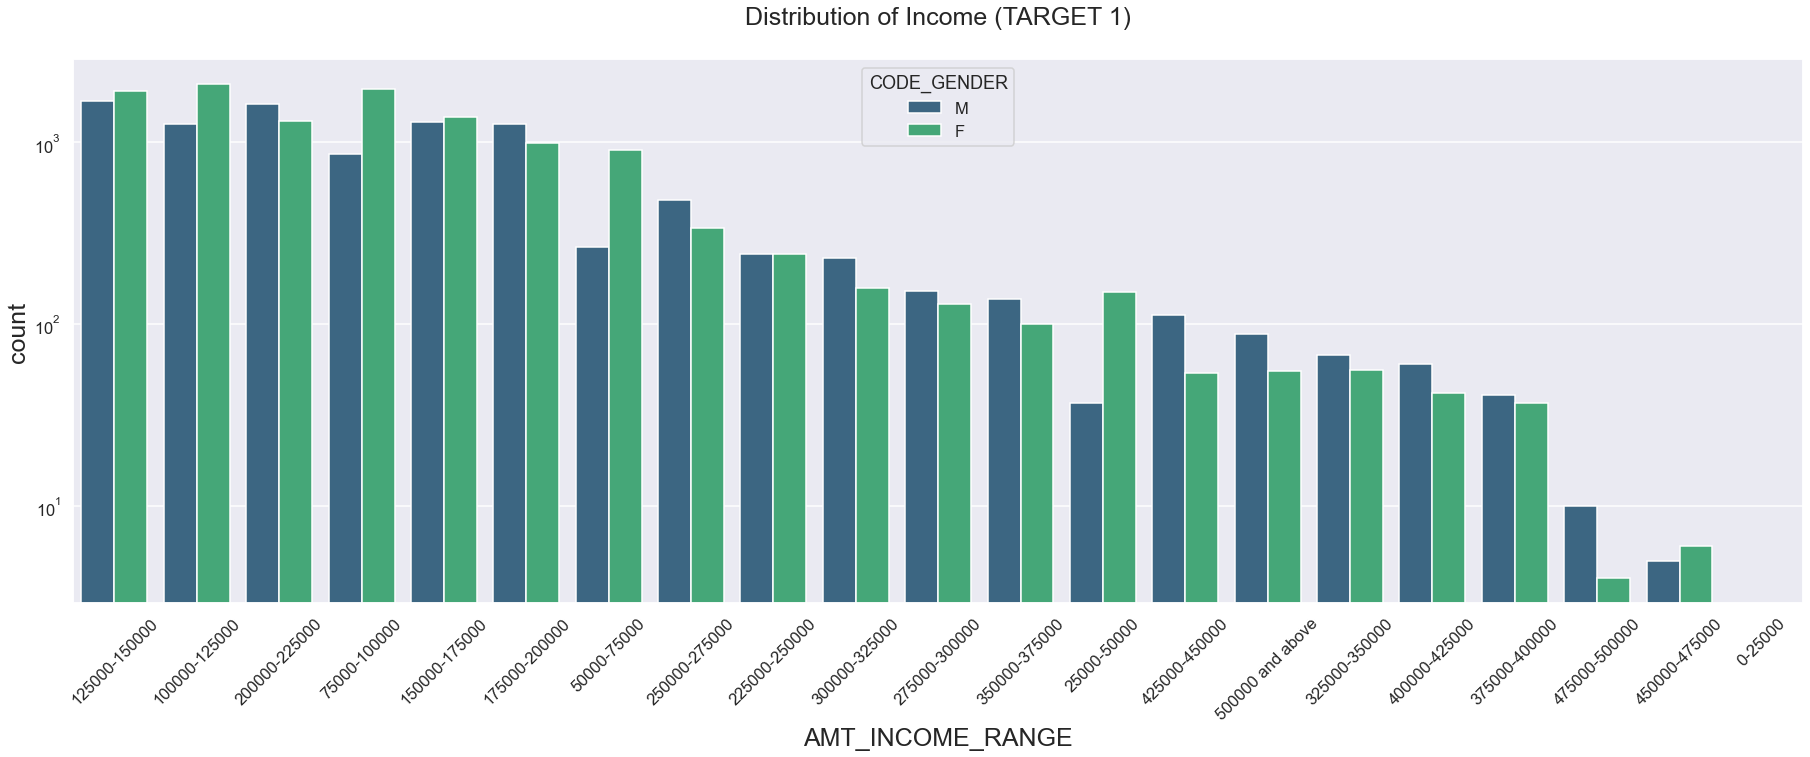

In [537]:
uniplot_target1(col='AMT_INCOME_RANGE',title='Distribution of Income (TARGET 1)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: There are more female applicant counts in amount income range 75k-100k than that of male applicants for target 1
2. There are equal male applicant and female counts in amount income range 225k-250k  for target 1

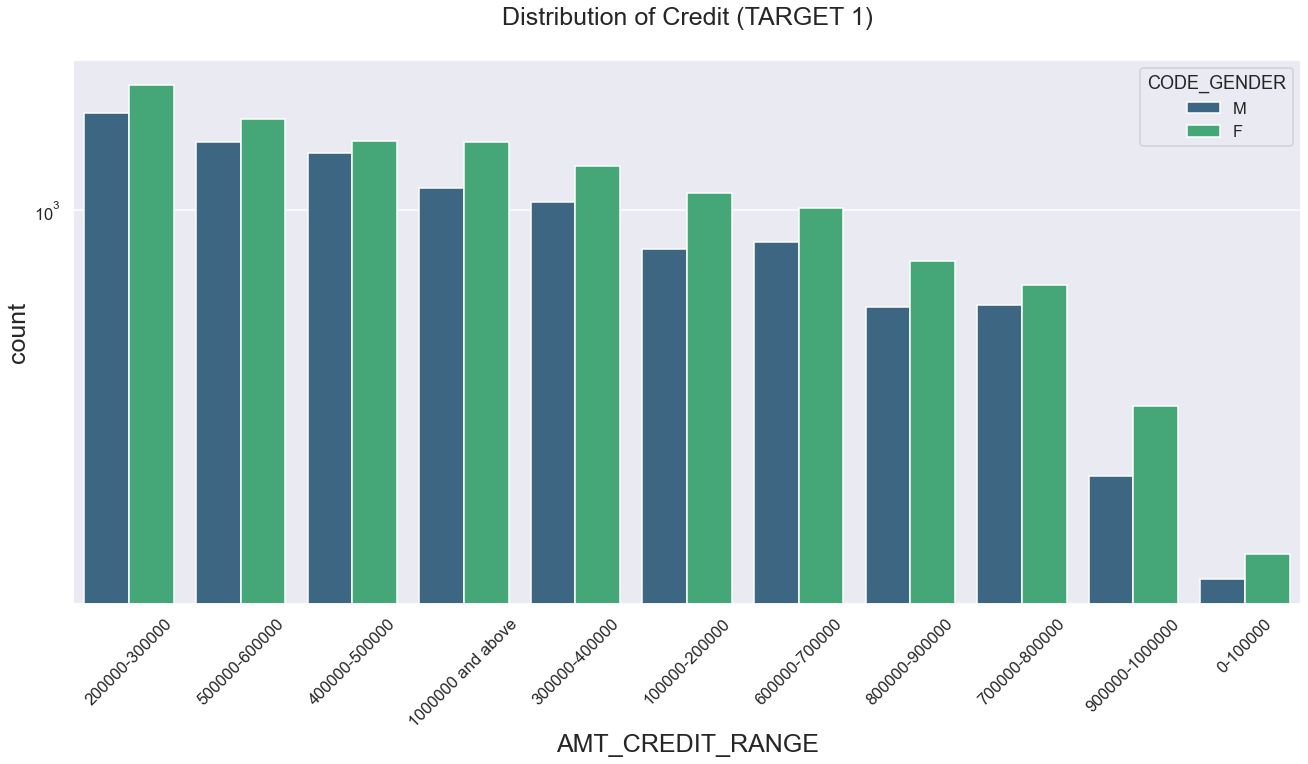

In [538]:
uniplot_target1(col='AMT_CREDIT_RANGE',title='Distribution of Credit (TARGET 1)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: There are more female applicants than that of males in all the amount credit ranges

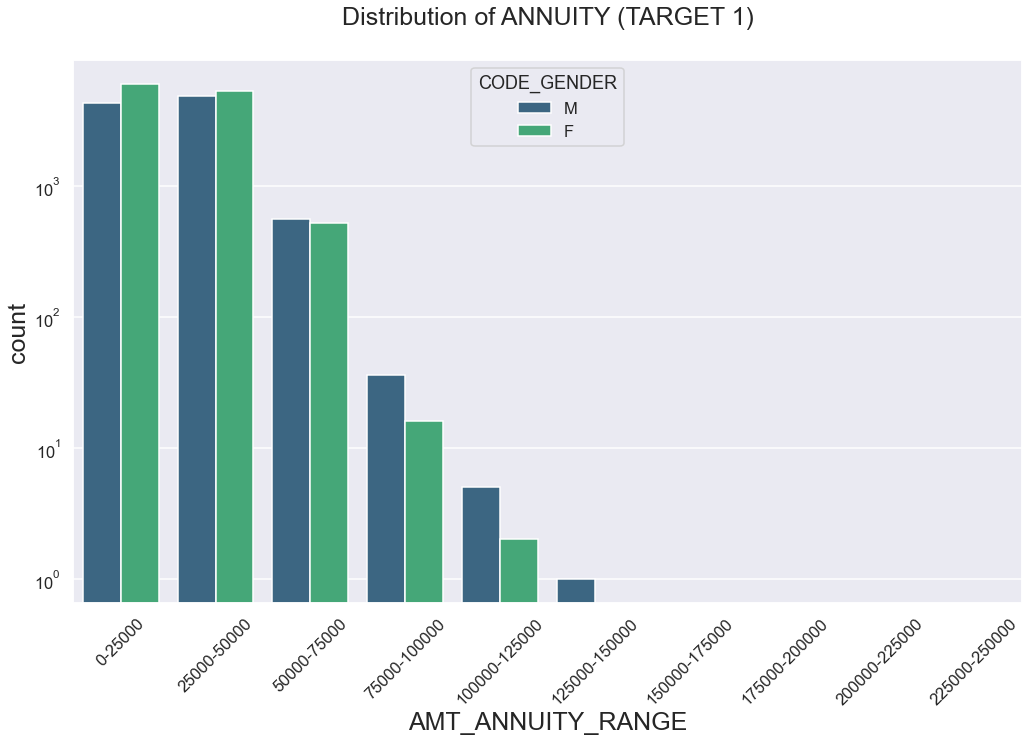

In [539]:
uniplot_target1(col='AMT_ANNUITY_RANGE',title='Distribution of ANNUITY (TARGET 1)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: There are nearly same male and female applicants for Amount annuity range 50k-75k for target 1.

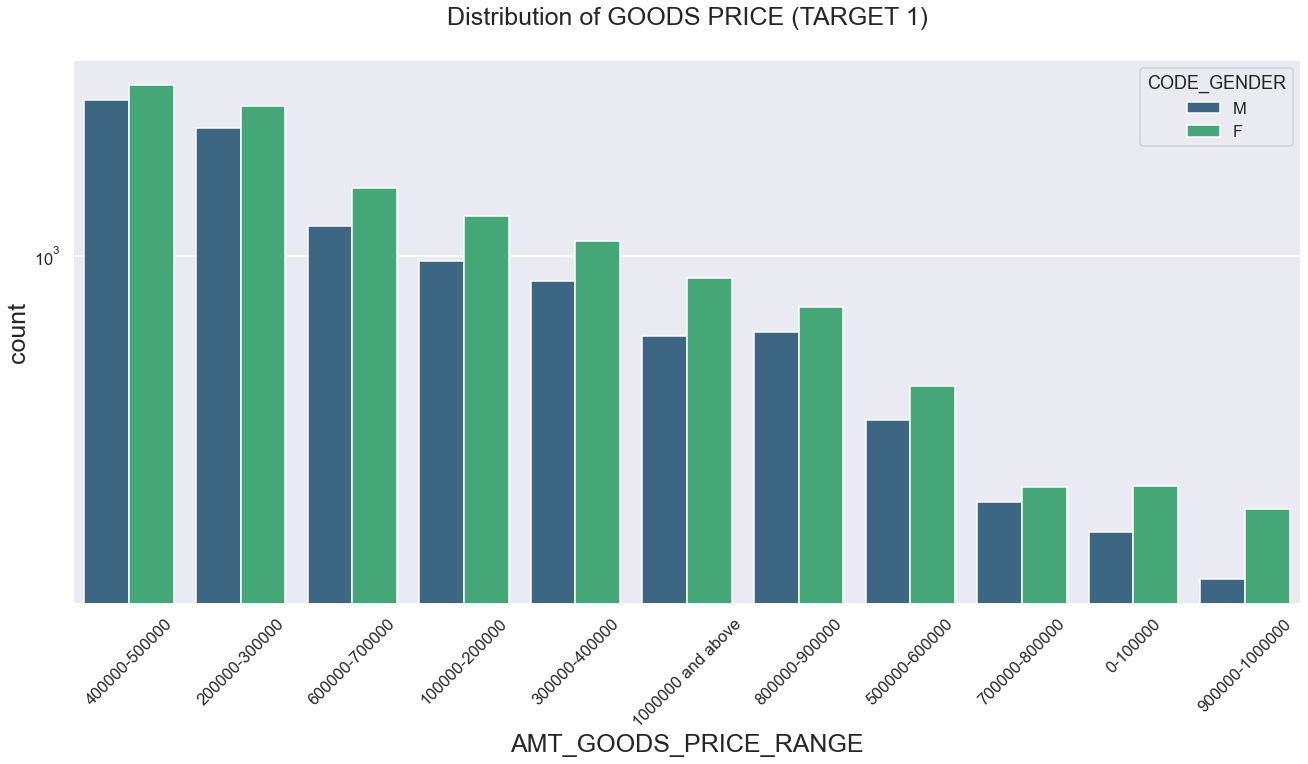

In [540]:
uniplot_target1(col='AMT_GOODS_PRICE_RANGE',title='Distribution of GOODS PRICE (TARGET 1)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: There are more female loan applicants than that of male in all range for goods amount price.

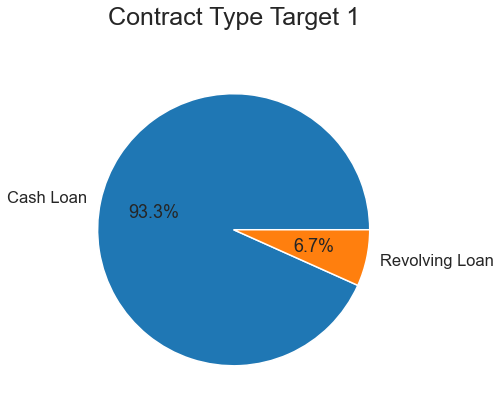

In [541]:
#Creating pie chart for NAME_CONTRACT_TYPE for target 1
contract_labels_target_1 = ['Cash Loan','Revolving Loan']
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.pie(current_application_data_target1['NAME_CONTRACT_TYPE'].value_counts(),labels=contract_labels_target_1,autopct='%.1f%%')
plt.title('Contract Type Target 1')
plt.tight_layout()
plt.show()

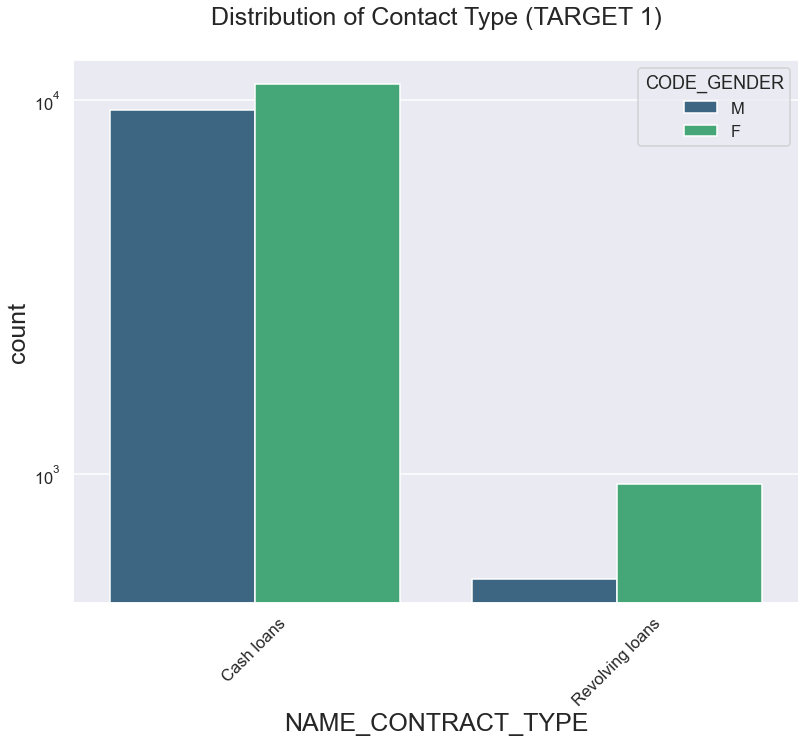

In [542]:
uniplot_target1(col='NAME_CONTRACT_TYPE',title='Distribution of Contact Type (TARGET 1)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: There are less male loan applicants than that of females in contract type cash and revolving loans.

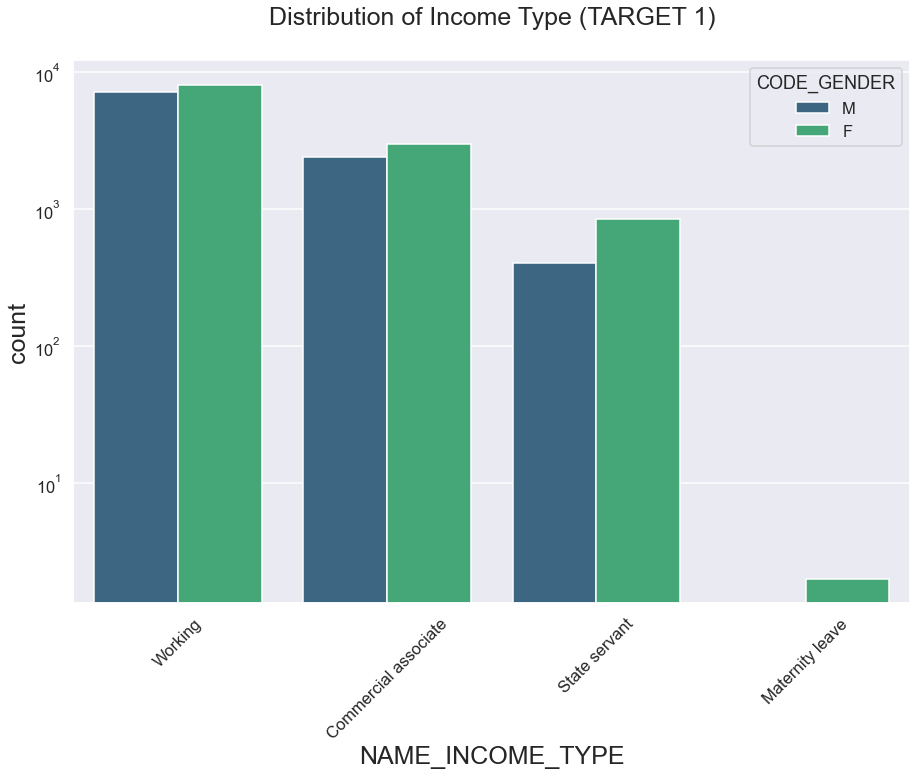

In [543]:
uniplot_target1(col='NAME_INCOME_TYPE',title='Distribution of Income Type (TARGET 1)',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>:  There Less working males than female applicats.

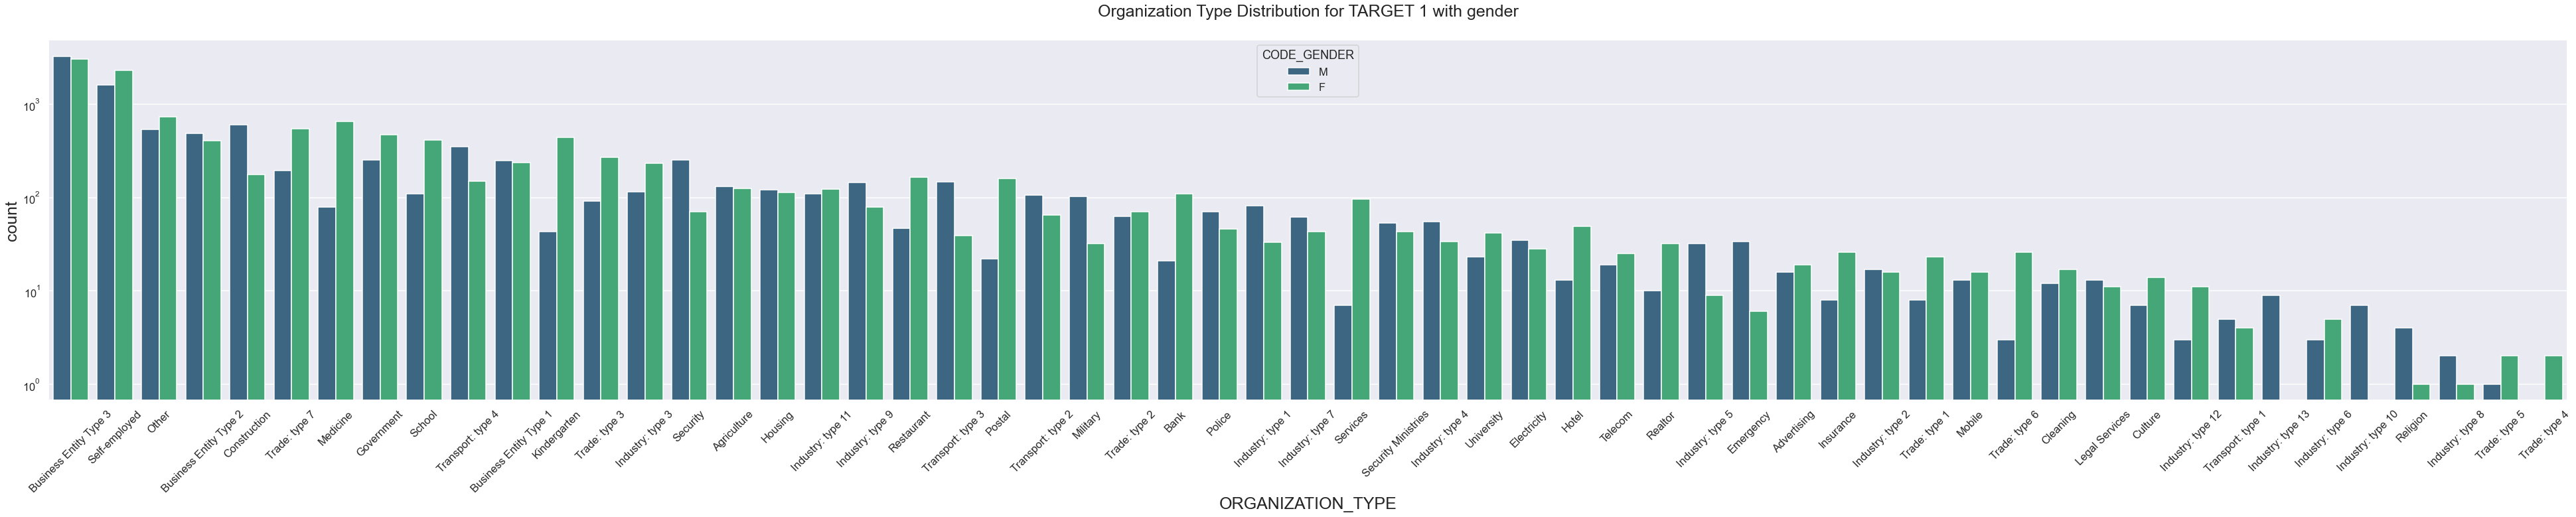

In [544]:
uniplot_target1(col='ORGANIZATION_TYPE',title='Organization Type Distribution for TARGET 1 with gender',hue='CODE_GENDER')

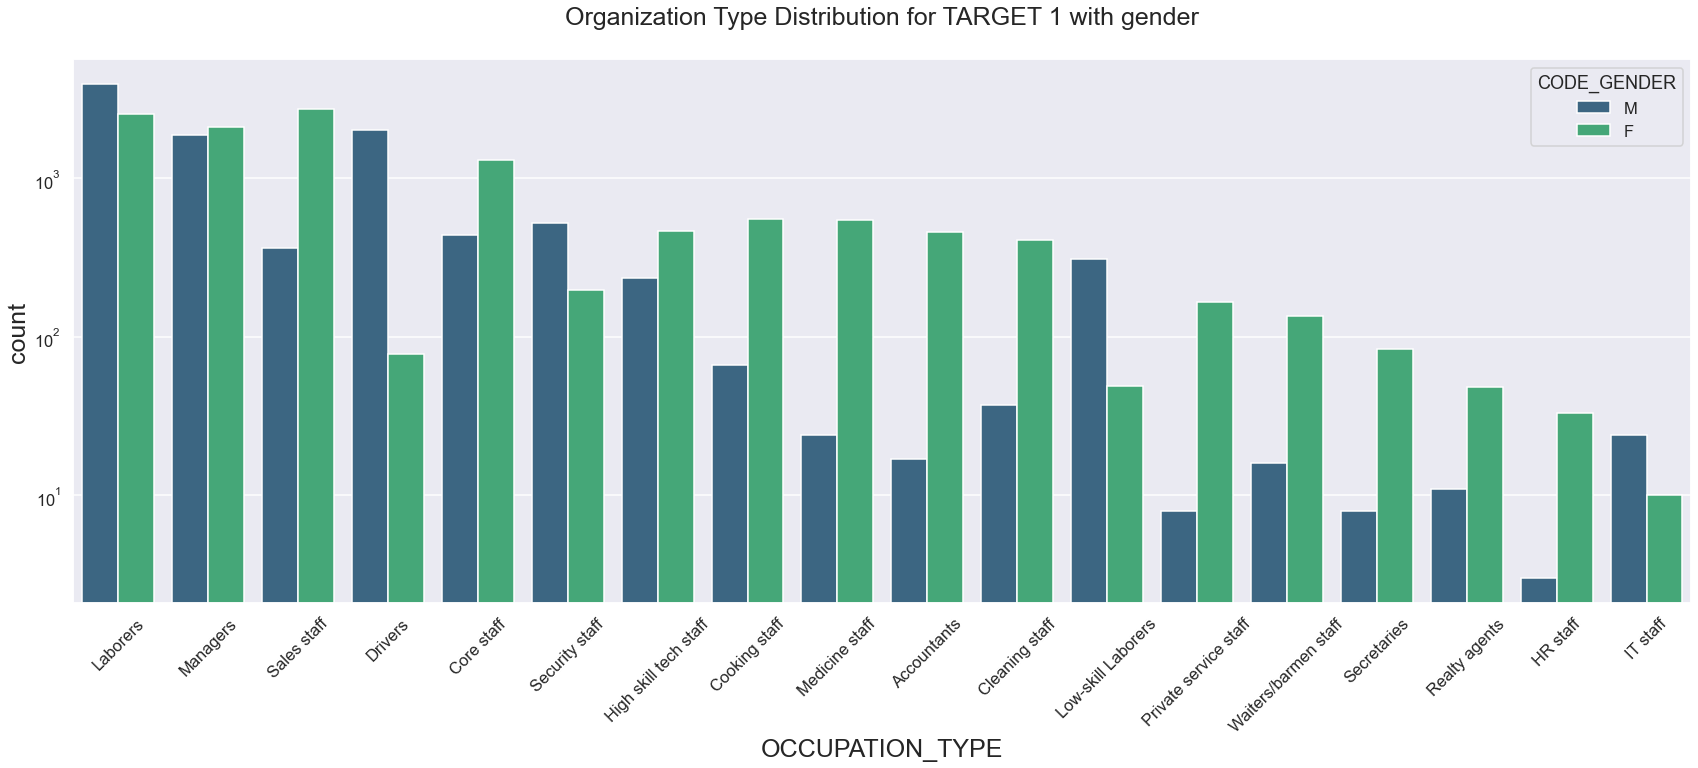

In [545]:
uniplot_target1(col='OCCUPATION_TYPE',title='Organization Type Distribution for TARGET 1 with gender',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: 1. More Male loan applicants are having laborer as occupation.
2. Mostly female applicants are having sale staff occupation type. 

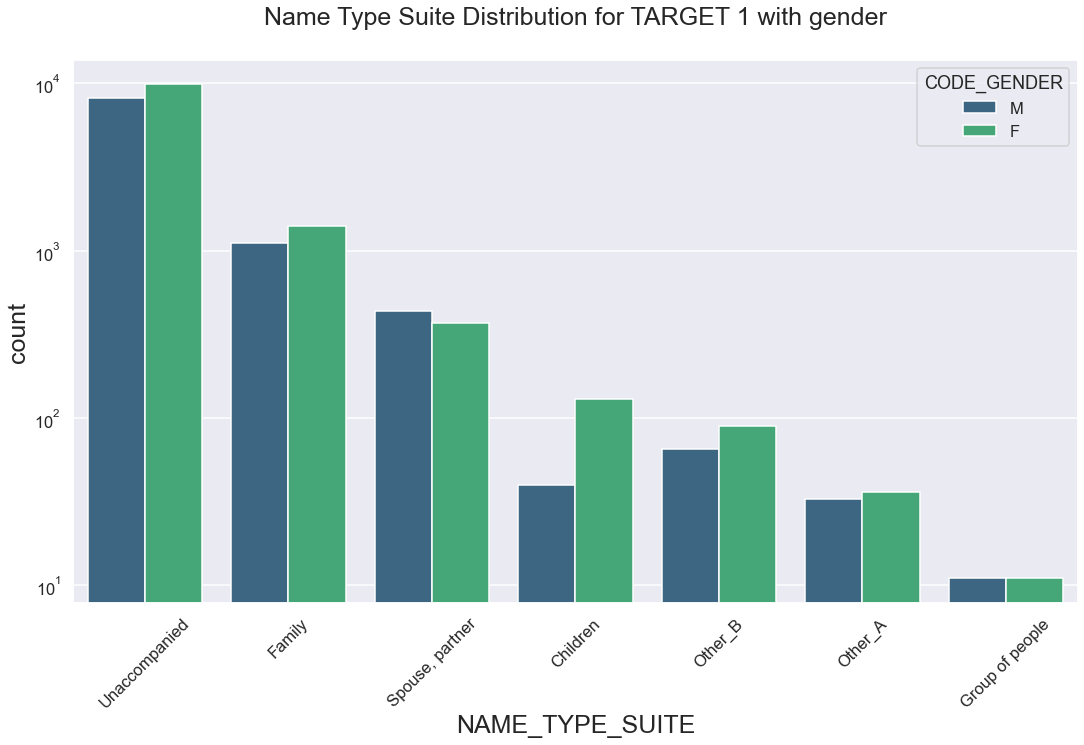

In [546]:
uniplot_target1(col='NAME_TYPE_SUITE',title='Name Type Suite Distribution for TARGET 1 with gender',hue='CODE_GENDER')

<b><font color = blue> Insights </font></b>: There are more female applicants than males in all name type suite.

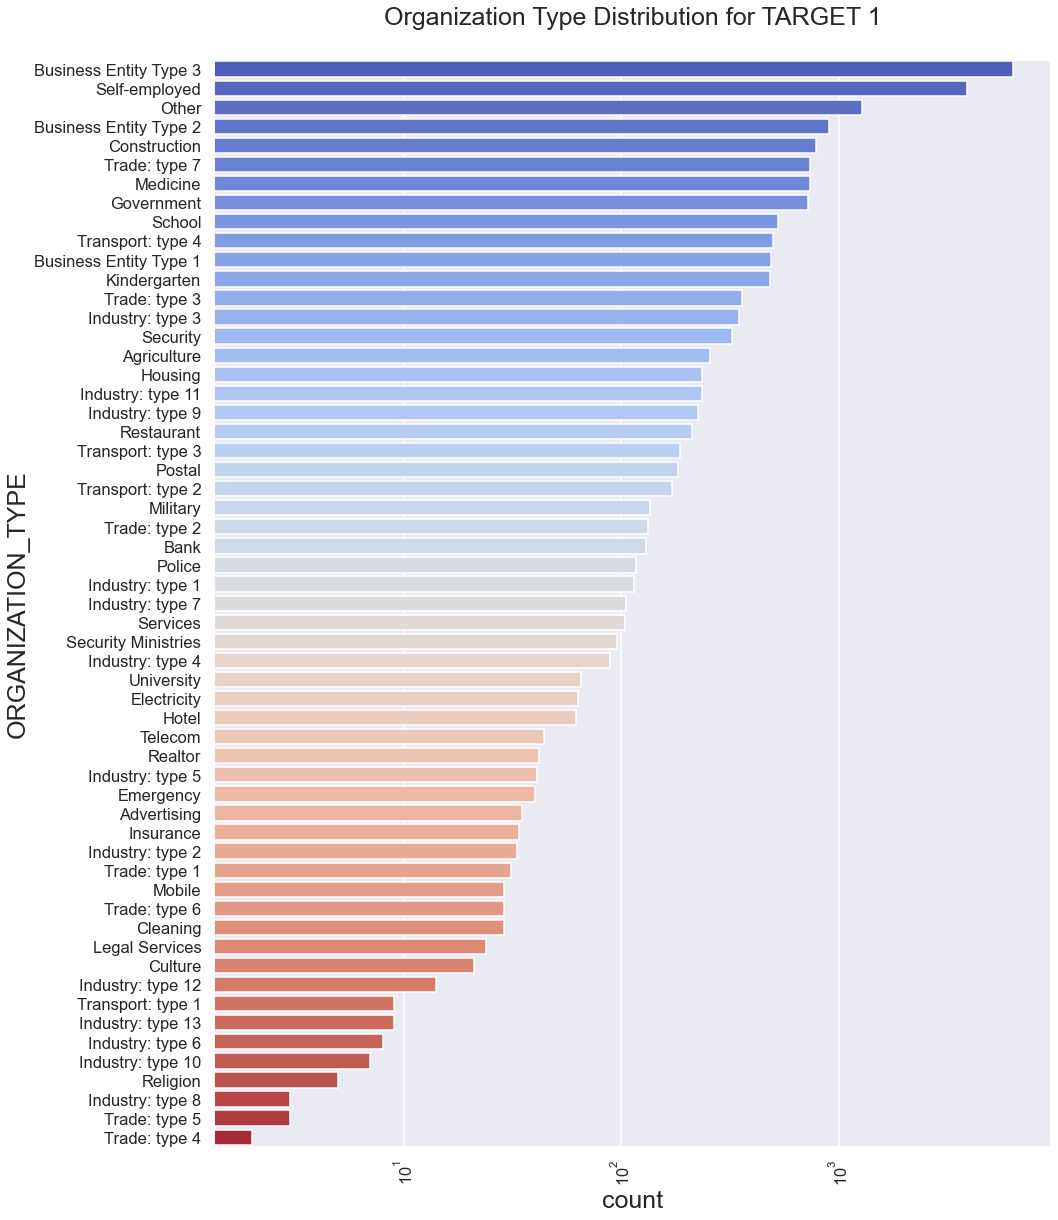

In [547]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 35
plt.xticks(rotation = 90)
plt.xscale('log')
plt.title('Organization Type Distribution for TARGET 1')
sns.countplot(data = current_application_data_target1,y='ORGANIZATION_TYPE',order=current_application_data_target1['ORGANIZATION_TYPE'].value_counts().index,palette='coolwarm') 
plt.show()

<b><font color = blue> Insights </font></b>: 1.For target-1 more loan applicants are from organization type business entity type 3 and self-employed.
2. For target-1 very less number of the loan applicants from  trade type 4 and trade type 5

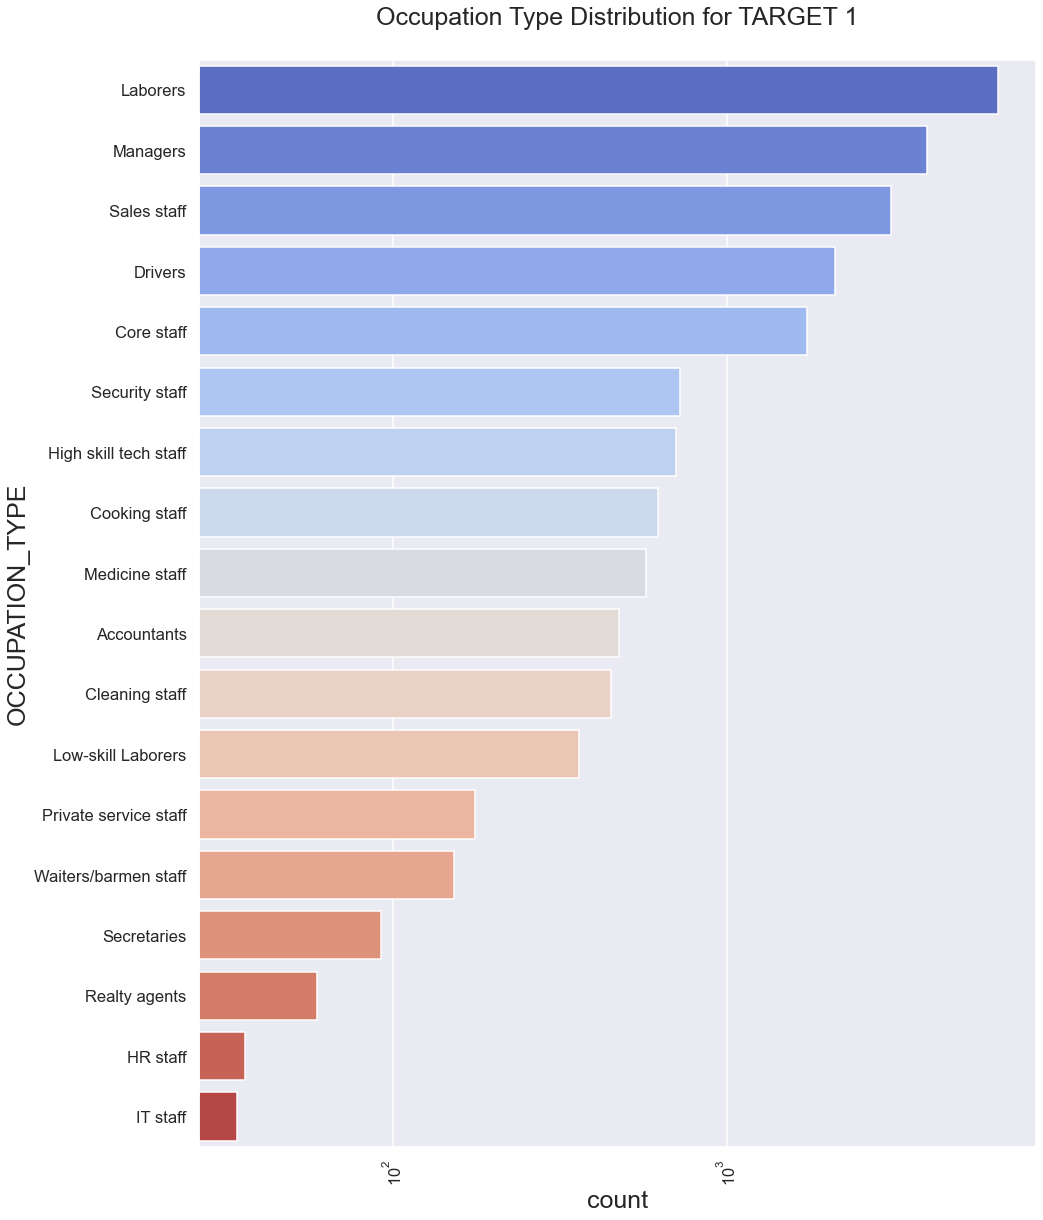

In [548]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 35
plt.xticks(rotation = 90)
plt.xscale('log')
plt.title('Occupation Type Distribution for TARGET 1')
sns.countplot(data = current_application_data_target1,y='OCCUPATION_TYPE',order=current_application_data_target1['OCCUPATION_TYPE'].value_counts().index,palette='coolwarm') 
plt.show()

<b><font color = blue> Insights </font></b>: 1. For target 1 most of the loan applicants are having occupation type Laborers.
2. For target 0 very few of the loan applicants are having occupation type IT staff.

Correlation between target 0 and target 1

In [549]:
target0_corr=current_application_data_target0.iloc[0:,2:]
target1_corr=current_application_data_target1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [550]:
target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
AMT_GOODS_PRICE                 -0.027084          0.408319    0.984499   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                      -0.266534          0.054666    0.169030   
DAYS_EMPLOYED                   -0.030948          0.060868    0.104251   
DAYS_REGISTRATION               -0.155518         -0.040559    0.015318   
DAYS_ID_PUBLISH                  0.119164          0.036702    0.038197   
CNT_FAM_MEMBERS                  0.848231         -0.011547    0.045682   
REGION_RATING_CLIENT             0.035561         -0.216438   -0.091606   
REGION_RATING_CLIENT_W_CITY      0.034350         -0.238145   -0.100894   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   
DAYS_LAST_PHONE_CHANGE           0.001645          0.052422    0.079351   
AMT_REQ_CREDIT_BUREAU_HOUR       0.000606          0.004924   -0.002374   
AMT_REQ_CREDIT_BUREAU_DAY        0.001692          0.009163    0.001759   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000941          0.014558   -0.002170   
AMT_REQ_CREDIT_BUREAU_MON       -0.008106          0.076992    0.047880   
AMT_REQ_CREDIT_BUREAU_QRT        0.002736          0.039499    0.035164   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.029067          0.059186   -0.026607   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   -0.010795        -0.027084   
AMT_INCOME_TOTAL                0.472204         0.408319   
AMT_CREDIT                      0.826689         0.984499   
AMT_ANNUITY                     1.000000         0.823739   
AMT_GOODS_PRICE                 0.823739         1.000000   
REGION_POPULATION_RELATIVE      0.064328         0.069873   
DAYS_BIRTH                      0.100287         0.169015   
DAYS_EMPLOYED                   0.074643         0.109297   
DAYS_REGISTRATION              -0.010712         0.014990   
DAYS_ID_PUBLISH                 0.027354         0.039771   
CNT_FAM_MEMBERS                 0.052969         0.045293   
REGION_RATING_CLIENT           -0.119092        -0.094005   
REGION_RATING_CLIENT_W_CITY    -0.133170        -0.102808   
HOUR_APPR_PROCESS_START         0.032953         0.044984   
REG_REGION_NOT_LIVE_REGION      0.033435         0.016810   
REG_REGION_NOT_WORK_REGION      0.070841         0.043014   
LIVE_REGION_NOT_WORK_REGION     0.069051         0.045765   
REG_CITY_NOT_LIVE_CITY         -0.019954        -0.041929   
REG_CITY_NOT_WORK_CITY         -0.024085        -0.039550   
LIVE_CITY_NOT_WORK_CITY        -0.008087        -0.013206   
DAYS_LAST_PHONE_CHANGE          0.066848         0.084767   
AMT_REQ_CREDIT_BUREAU_HOUR      0.004442        -0.001558   
AMT_REQ_CREDIT_BUREAU_DAY       0.003250         0.001925   
AMT_REQ_CREDIT_BUREAU_WEEK      0.013836        -0.001203   
AMT_REQ_CREDIT_BUREAU_MON       0.046751         0.049157   
AMT_REQ_CREDIT_BUREAU_QRT       0.029582         0.036345   
AMT_REQ_CREDIT_BUREAU_YEAR      0.007484        -0.028675   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                  -0.030579   -0.266534   
AMT_INCOME_TOTAL                               0.110074    0.054666   
AMT_CR

In [551]:
target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
AMT_GOODS_PRICE                 -0.005792          0.369080    0.975458   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                      -0.175025          0.103026    0.200718   
DAYS_EMPLOYED                   -0.006823          0.053798    0.107605   
DAYS_REGISTRATION               -0.110854         -0.011378    0.021973   
DAYS_ID_PUBLISH                  0.091042          0.051113    0.065143   
CNT_FAM_MEMBERS                  0.845289         -0.029655    0.060267   
REGION_RATING_CLIENT             0.048236         -0.163605   -0.050664   
REGION_RATING_CLIENT_W_CITY      0.049688         -0.181015   -0.063304   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   
DAYS_LAST_PHONE_CHANGE          -0.015176          0.076684    0.106939   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.000694          0.011622    0.004104   
AMT_REQ_CREDIT_BUREAU_DAY       -0.006995         -0.001456   -0.003968   
AMT_REQ_CREDIT_BUREAU_WEEK       0.001612          0.028747    0.010071   
AMT_REQ_CREDIT_BUREAU_MON       -0.017158          0.089452    0.052620   
AMT_REQ_CREDIT_BUREAU_QRT       -0.008893          0.041152    0.000441   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.023847          0.085738   -0.007980   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.015133        -0.005792   
AMT_INCOME_TOTAL                0.428947         0.369080   
AMT_CREDIT                      0.812093         0.975458   
AMT_ANNUITY                     1.000000         0.805644   
AMT_GOODS_PRICE                 0.805644         1.000000   
REGION_POPULATION_RELATIVE      0.028666         0.058364   
DAYS_BIRTH                      0.100200         0.198796   
DAYS_EMPLOYED                   0.060193         0.116043   
DAYS_REGISTRATION              -0.019762         0.023023   
DAYS_ID_PUBLISH                 0.044128         0.069184   
CNT_FAM_MEMBERS                 0.062994         0.058337   
REGION_RATING_CLIENT           -0.059905        -0.060755   
REGION_RATING_CLIENT_W_CITY    -0.076330        -0.072660   
HOUR_APPR_PROCESS_START         0.021129         0.037319   
REG_REGION_NOT_LIVE_REGION      0.029646         0.018455   
REG_REGION_NOT_WORK_REGION      0.060363         0.036891   
LIVE_REGION_NOT_WORK_REGION     0.059724         0.038092   
REG_CITY_NOT_LIVE_CITY         -0.011744        -0.031673   
REG_CITY_NOT_WORK_CITY         -0.015938        -0.034329   
LIVE_CITY_NOT_WORK_CITY        -0.003012        -0.012464   
DAYS_LAST_PHONE_CHANGE          0.077735         0.119556   
AMT_REQ_CREDIT_BUREAU_HOUR      0.012842         0.006946   
AMT_REQ_CREDIT_BUREAU_DAY      -0.002594        -0.004166   
AMT_REQ_CREDIT_BUREAU_WEEK      0.035096         0.012878   
AMT_REQ_CREDIT_BUREAU_MON       0.061380         0.056629   
AMT_REQ_CREDIT_BUREAU_QRT       0.006869         0.003782   
AMT_REQ_CREDIT_BUREAU_YEAR      0.005776        -0.008408   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                  -0.029682   -0.175025   
AMT_INCOME_TOTAL                               0.058005    0.103026   
AMT_CR

In [552]:
def correlation_targets(data,title,cmap):
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 75
    plt.figure(figsize=(20,15))
    
    sns.heatmap(data,cmap=cmap,annot=False)
    
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

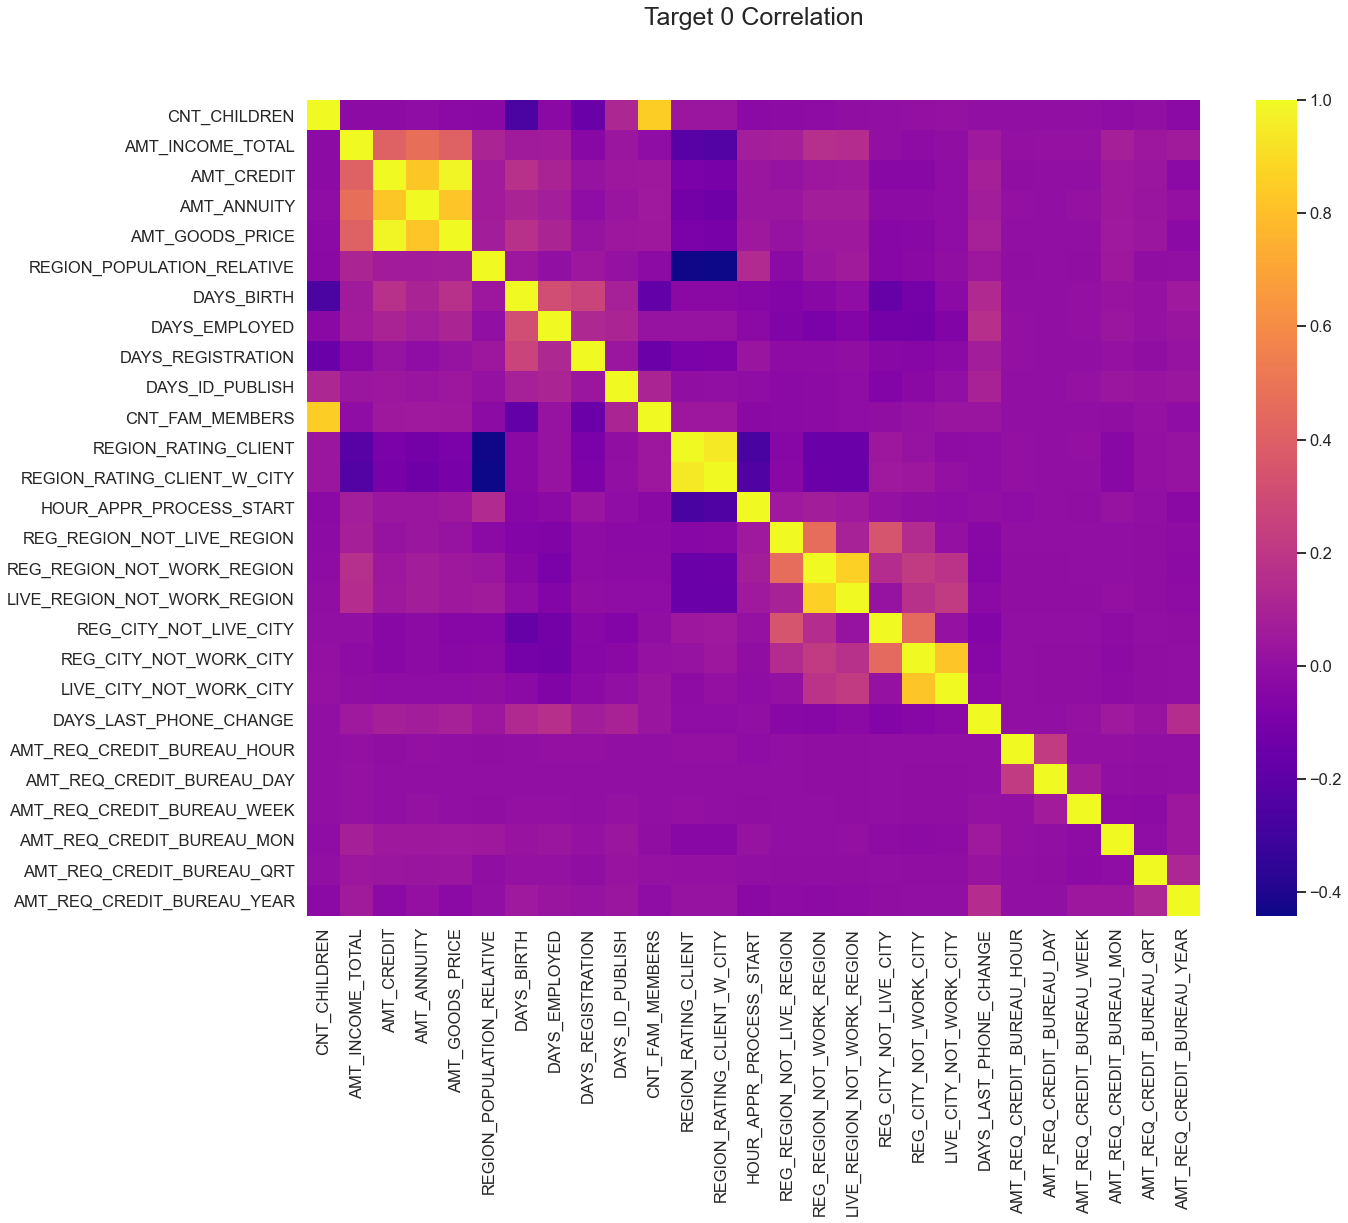

In [553]:
correlation_targets(data=target0,title='Target 0 Correlation',cmap='plasma')

<b><font color = blue> Insights </font></b>: 1. Amount good price is highly correlated with Amount credit.
2. Region rating client has negative correlation region population relative.
3. Amount Annuity has positive correlation with amount credit.

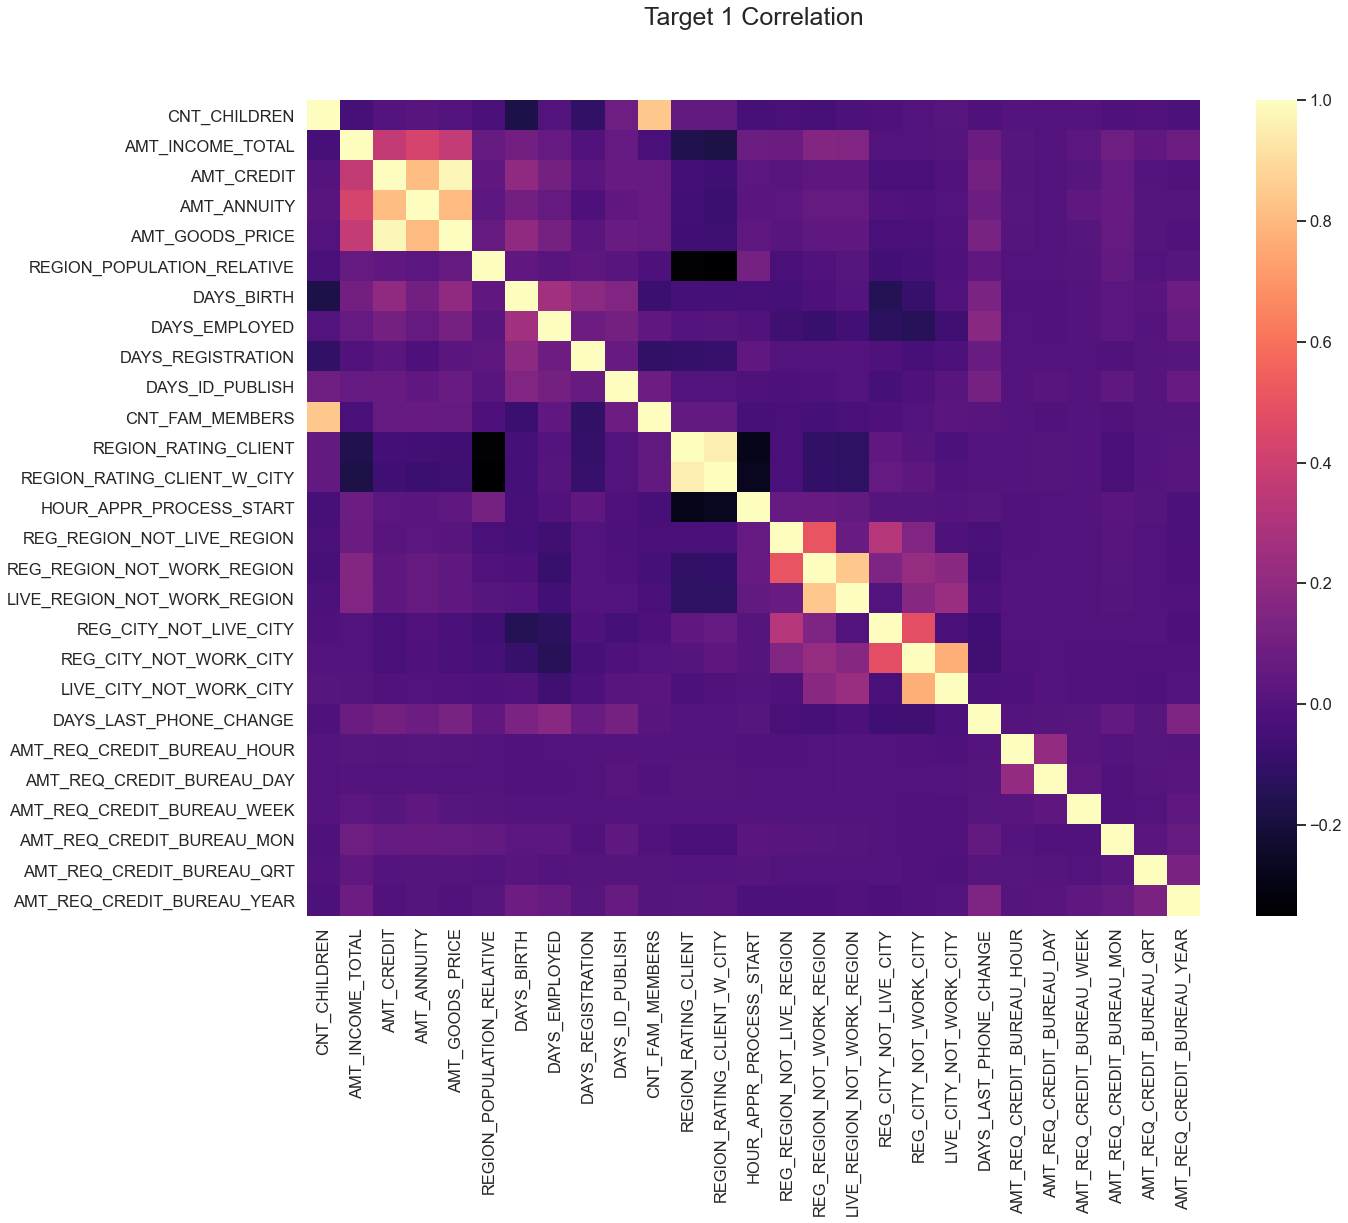

In [554]:
correlation_targets(data=target1,title='Target 1 Correlation',cmap='magma')

<b><font color = blue> Insights </font></b>:1.Credit amount is highly correlated with good price amount for target -1.
2. Amount annuity is correlation amount credit.
3. There is a the correlation (~0.4) between total income of the applicant and the credit amount.
4. There is inverse correlation between amount income and number of employment days.
5. Count of family members has a high correlation with count of children.


#### Categorical Univariate analysis for variables target 0

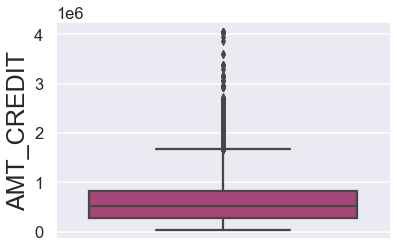

In [555]:
sns.boxplot(data =current_application_data_target0, y='AMT_CREDIT',palette='magma')
plt.show()

<b><font color = blue> Inference </font></b>: It can be seen that there are a handsome amount of applicants having loan amount credited more than 2 lakhs

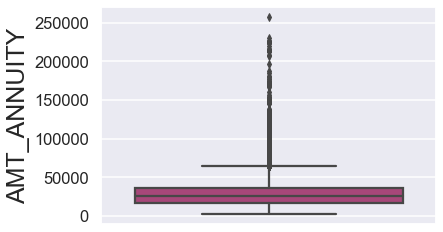

In [556]:
sns.boxplot(data =current_application_data_target0, y='AMT_ANNUITY',palette='magma')
plt.show()

<b><font color = blue> Inference </font></b>: There is applicant having annuity amount around 250k which can be considered as outlier.

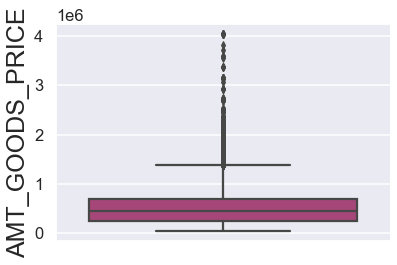

In [557]:
sns.boxplot(data =current_application_data_target0, y='AMT_GOODS_PRICE',palette='magma')
plt.show()

<b><font color = blue> Inference </font></b>: There are applicants applied for loan of good price more than 2 lakhs.

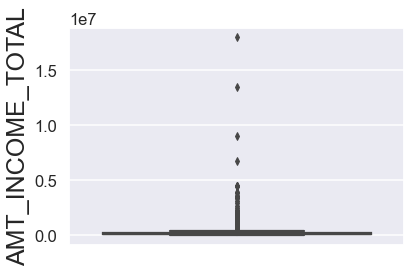

In [558]:
sns.boxplot(data =current_application_data_target0, y='AMT_INCOME_TOTAL',palette='magma')
plt.show()

<b><font color = blue> Inference </font></b>: There are few outliers how have income above 1 lakhs.

#### Categorical Bivarient for Target 1

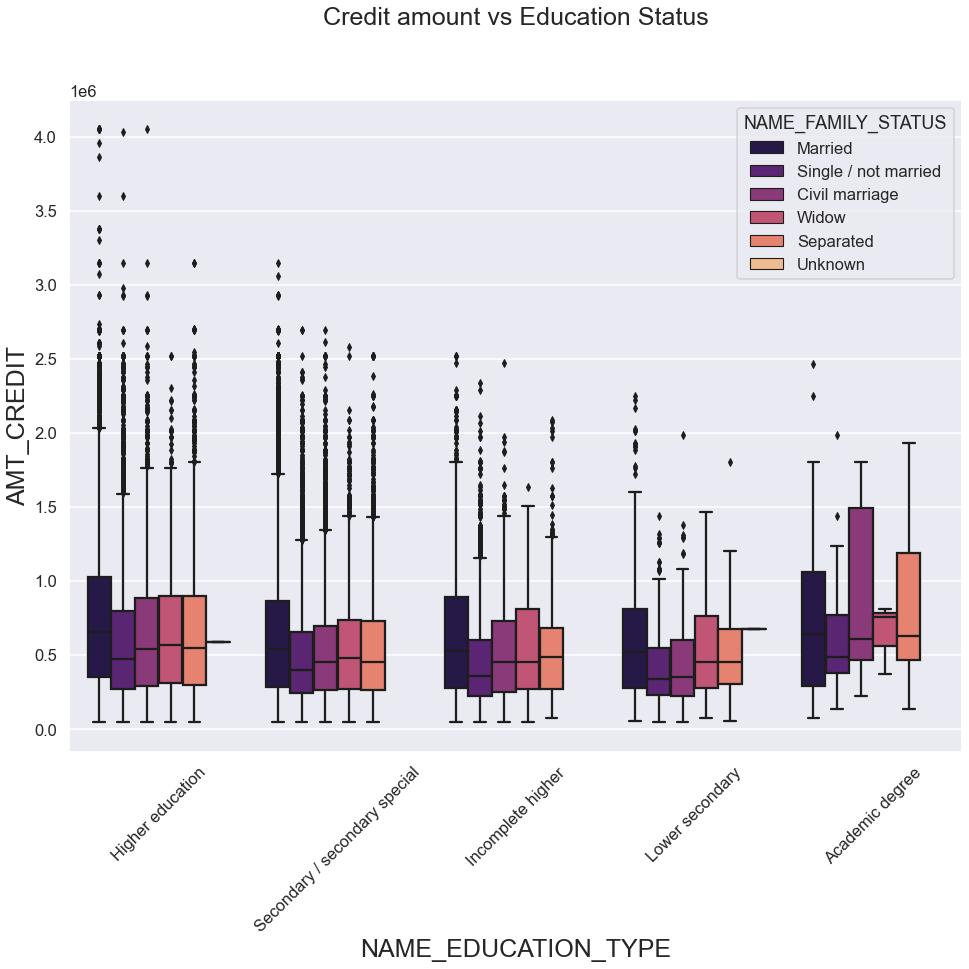

In [559]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='magma')
plt.title('Credit amount vs Education Status')
plt.show()

<b><font color = blue> Inference </font></b>: 1. We can see the highest amount credited for applicants in Academic degree education type and having family status as civil married.
2. We can see the lowest 50% percentile amount credit for applicant in lower secondary academic degree education type and having family status as single/ not married.
3. There are outliers in amounted credited for higher education for married, single and Civil married applicants.

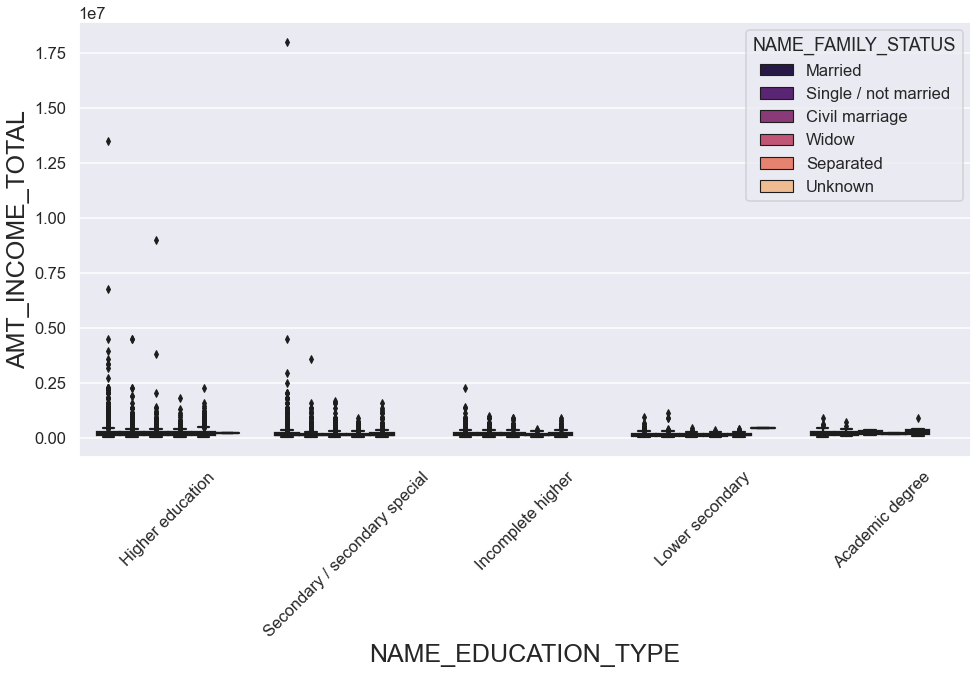

In [560]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v',palette='magma')
plt.show()           

<b><font color = blue> Inference </font></b>: There is highest outliers for income of applicants having education type secondary special and family status married.


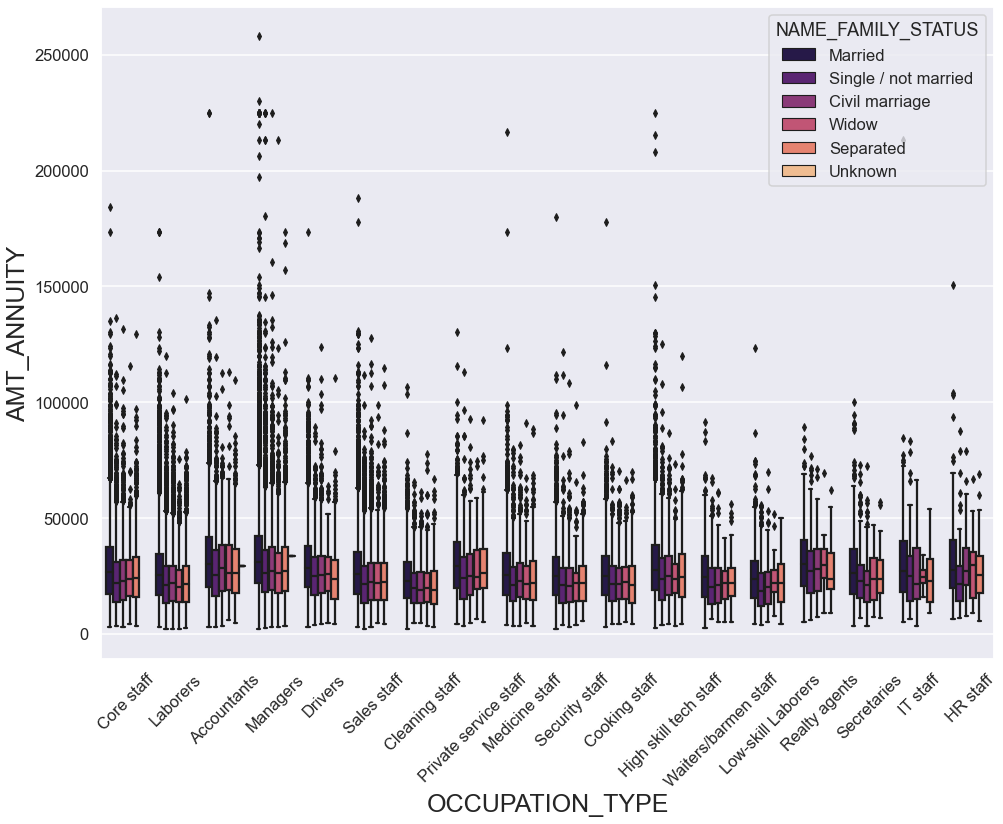

In [561]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target0,x='OCCUPATION_TYPE',y='AMT_ANNUITY',hue='NAME_FAMILY_STATUS',orient='v',palette='magma')
plt.show()

<b><font color = blue> Inference </font></b>: 1. There are lot of outliers present in the above plot.
2. There is the highest annuity amount for married managers applicants.

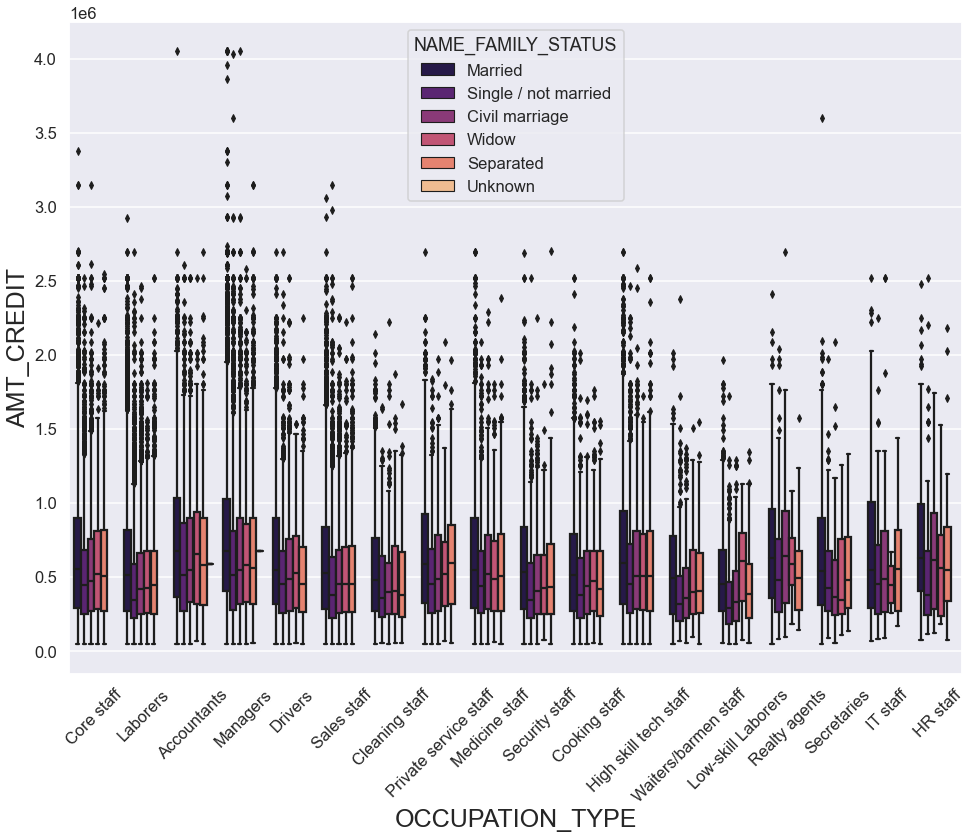

In [562]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target0,x='OCCUPATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v',palette='magma')
plt.show()

<b><font color = blue> Inference </font></b>: 1. There are lot of outliers present in the above plot.
2. There is highest amount credited for applicants having occupation type Accountants and manager and family status married.
3. 50% percentile for the High skill tech staff having family status civil married, widow, seprated is nearly same.

#### Categorical Univariate analysis for variables target 1

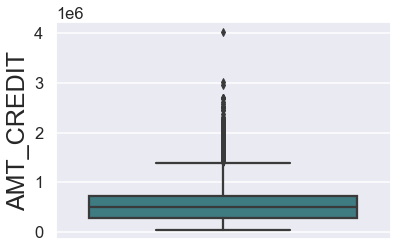

In [563]:
sns.boxplot(data =current_application_data_target1, y='AMT_CREDIT',palette='crest')
plt.show()

<b><font color = blue> Inference </font></b>:  There is applicant having amount credited around 4 lakhs which can be considered as outlier.

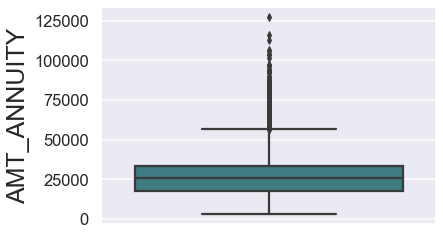

In [564]:
sns.boxplot(data =current_application_data_target1, y='AMT_ANNUITY',palette='crest')
plt.show()

<b><font color = blue> Inference </font></b>: There are few outliers in the above plot.

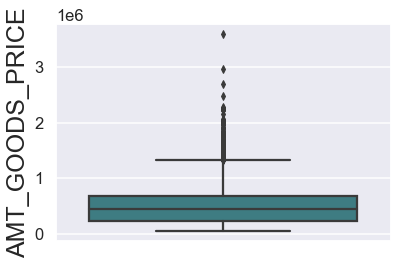

In [565]:
sns.boxplot(data =current_application_data_target1, y='AMT_GOODS_PRICE',palette='crest')
plt.show()

<b><font color = blue> Inference </font></b>: Good price more than 3 lakhs can be considered as outlier.

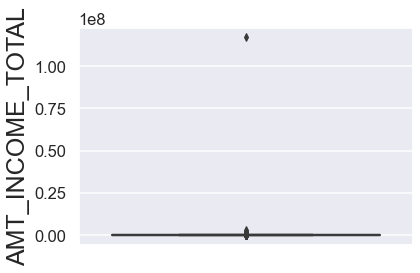

In [566]:
sns.boxplot(data =current_application_data_target1, y='AMT_INCOME_TOTAL',palette='crest')
plt.show()

<b><font color = blue> Inference </font></b>: Total income of applicant more than 1 crore can be considered as an outlier.

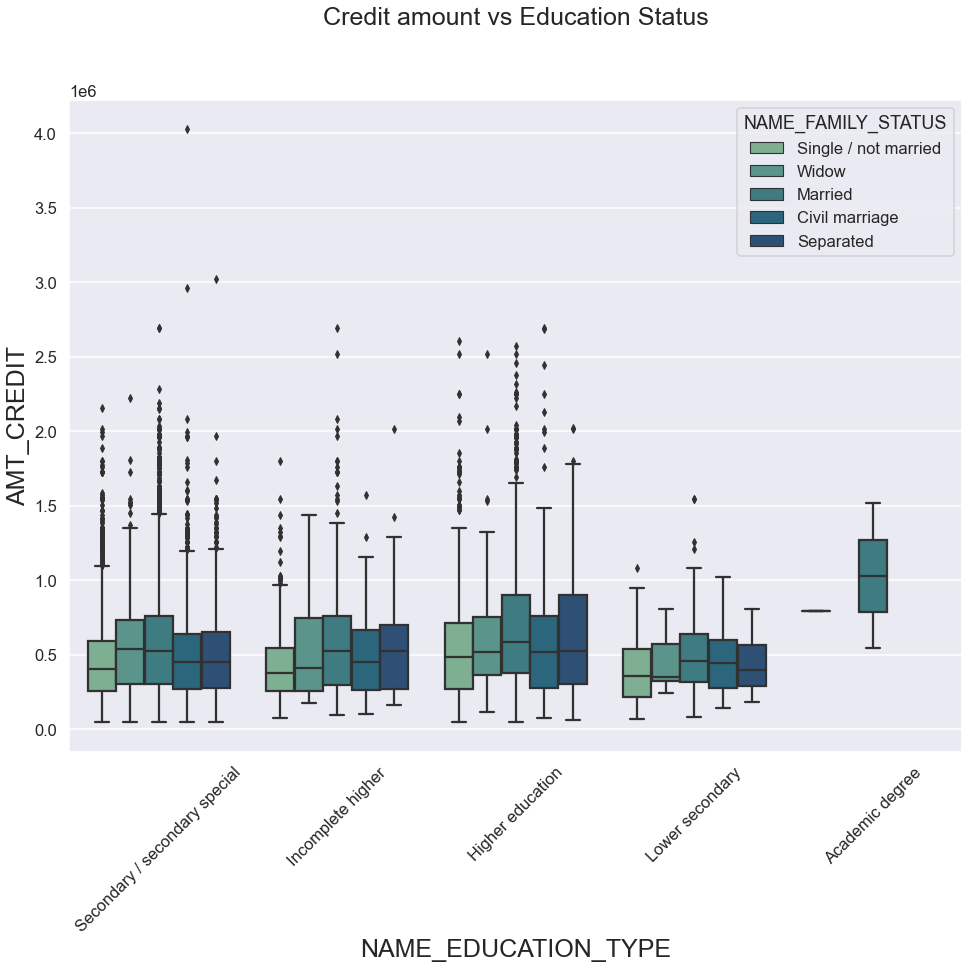

In [567]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='crest')
plt.title('Credit amount vs Education Status')
plt.show()

<b><font color = blue> Inference </font></b>:1.The highest 50% percentile of amount credited can be seen for applicants having education type academic degree.
2. Less outliers are present for applicants having education type academic degree.
3. 90% of amount credit for widow and married applicants having education type incomplete higer is nearly same.

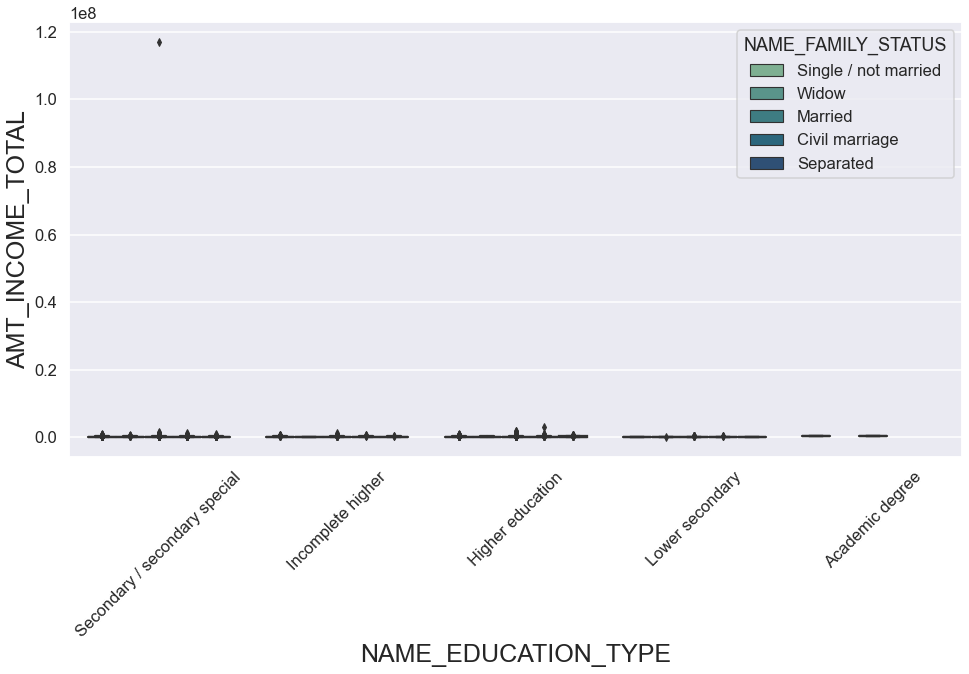

In [568]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v',palette='crest')
plt.show() 

<b><font color = blue> Inference </font></b>: There are outliers in the seconday special v/s amount income plot.

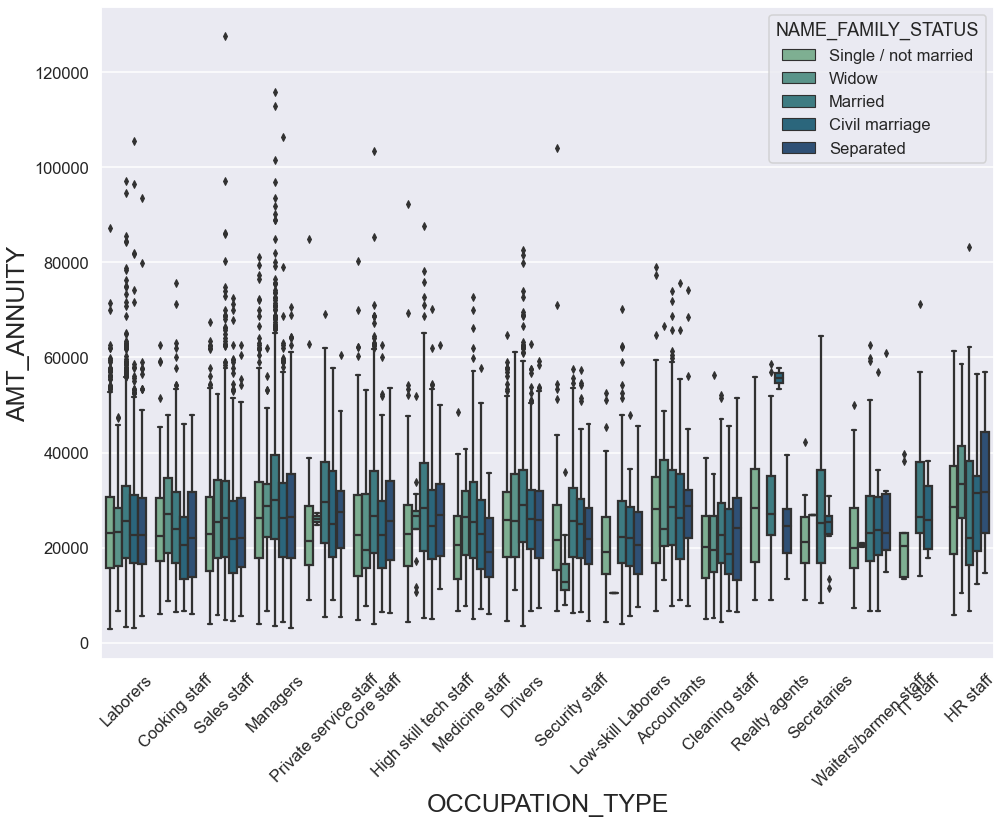

In [569]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target1,x='OCCUPATION_TYPE',y='AMT_ANNUITY',hue='NAME_FAMILY_STATUS',orient='v',palette='crest')
plt.show()

<b><font color = blue> Inference </font></b>: 1. There are lot of outliers present in the above plot.
2. Sale staff married applicants have more number of outliers.
3. There is highest amount annuity is for married secretaries applicants.

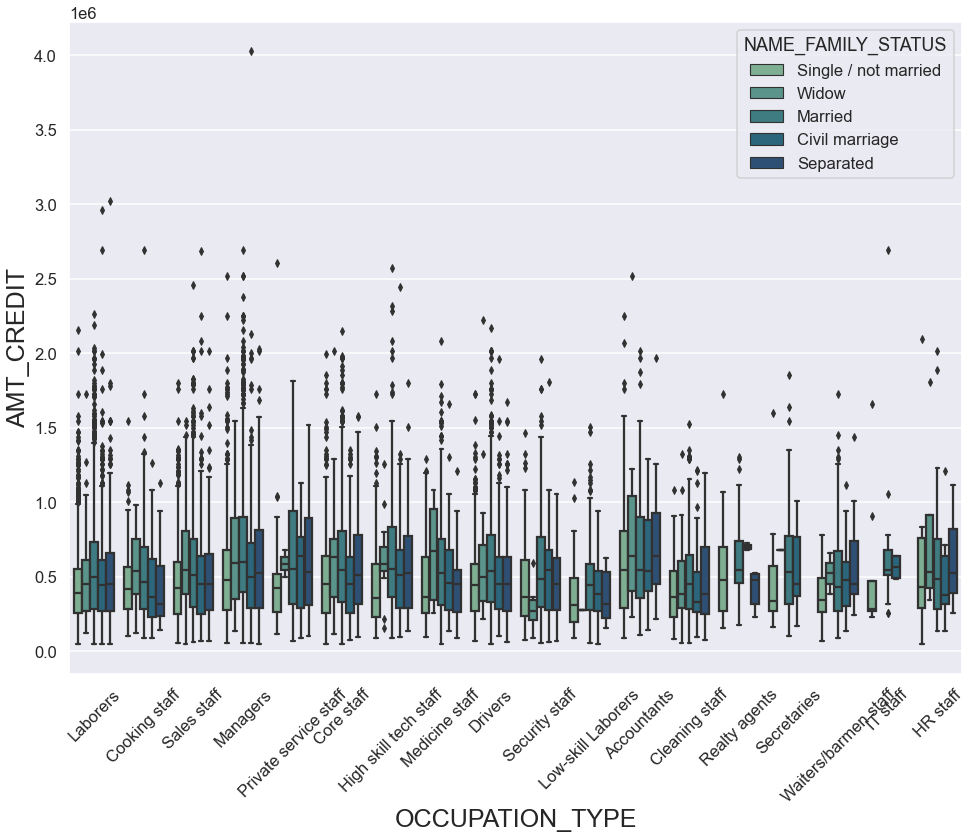

In [570]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = current_application_data_target1,x='OCCUPATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v',palette='crest')
plt.show()

<b><font color = blue> Inference </font></b>: The highest amount credited for married applicants having occupation type private service staff.

## Working on Previous Application Data

In [571]:
#reading the application
previous_application_data = pd.read_csv('previous_application.csv')

In [572]:
previous_application_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [573]:
#Finding number of rows and columns in previous_application_data dataframe
previous_application_data.shape

(1670214, 37)

In [574]:
# Finding null values in previous_application_data dataframe
null_columns_prev= previous_application_data.columns[previous_application_data.isnull().any()]

In [575]:
null_value_percent_prev = previous_application_data[null_columns_prev].isnull().sum().sort_values()*100/len(previous_application_data)

In [576]:
null_value_percent_prev

AMT_CREDIT                    0.000060
PRODUCT_COMBINATION           0.020716
CNT_PAYMENT                  22.286366
AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
NAME_TYPE_SUITE              49.119754
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
dtype: float64

In [577]:
len(null_value_percent_prev)

16

In [578]:
#Finding the column having  50% null value
missing_column_50_prev = null_value_percent_prev[null_value_percent_prev>50].sort_values(ascending=False)

In [579]:
missing_column_50_prev

RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
dtype: float64

In [580]:
#Dropping the columns having null values more than 50%
previous_application_data.drop(columns = missing_column_50_prev.index,inplace = True)

In [581]:
previous_application_data.shape

(1670214, 33)

In [582]:
100*(previous_application_data.isnull().sum()/len(previous_application_data))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [583]:
# Analysis the NAME_CASH_LOAN_PURPOSE in previous_application_data dataframe
previous_application_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [584]:
#Checking the percentage of NAME_CASH_LOAN_PURPOSE
100*(previous_application_data['NAME_CASH_LOAN_PURPOSE'].value_counts()/len(previous_application_data['NAME_CASH_LOAN_PURPOSE']))

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

<b><font color = blue> Inference </font></b>: We can see the percentage of XNA and XAP as 40% and 55.2% so we are removing it

In [585]:
#Removing XNA and XAP

previous_application_data = previous_application_data.drop(previous_application_data.loc[previous_application_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

previous_application_data = previous_application_data.drop(previous_application_data.loc[previous_application_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [586]:
#Checking the percentage of NAME_CASH_LOAN_PURPOSE after removing XNA and XPA
100*(previous_application_data['NAME_CASH_LOAN_PURPOSE'].value_counts()/len(previous_application_data['NAME_CASH_LOAN_PURPOSE']))

Repairs                             34.127953
Other                               22.414016
Urgent needs                        12.080132
Buying a used car                    4.147340
Building a house or an annex         3.867308
Everyday expenses                    3.469520
Medicine                             3.121993
Payments on other loans              2.773031
Education                            2.258922
Journey                              1.779278
Purchase of electronic equipment     1.523659
Buying a new car                     1.453292
Wedding / gift / holiday             1.381489
Buying a home                        1.242191
Car repairs                          1.144539
Furniture                            1.075609
Buying a holiday home / land         0.765420
Business development                 0.611761
Gasification / water supply          0.430818
Buying a garage                      0.195304
Hobby                                0.078983
Money for a third person          

In [587]:
#Finding null values count in AMT_ANNUITY column in previous_application_data
previous_application_data['AMT_ANNUITY'].isnull().sum()

263

In [588]:
previous_application_data['AMT_ANNUITY'].describe()

count     69372.000000
mean      25682.780030
std       17426.515193
min           0.000000
25%       13595.175000
50%       21368.250000
75%       32681.250000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

<b><font color = blue> Inference </font></b>: we are filling the null value of the AMT_ANNUITY as median and 50% is nearly same.

In [589]:
previous_application_data.loc[previous_application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=previous_application_data['AMT_ANNUITY'].median()

In [590]:
previous_application_data['AMT_ANNUITY'].isnull().sum()

0

In [591]:
previous_application_data['AMT_CREDIT'].isnull().sum()

0

In [592]:
previous_application_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [593]:
100*(previous_application_data.isnull().sum()/len(previous_application_data))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                39.029224
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [594]:
# Find null values count in NAME_TYPE_SUITE
previous_application_data['NAME_TYPE_SUITE'].isnull().sum()

27178

In [595]:
previous_application_data['NAME_TYPE_SUITE'].describe()

count             42457
unique                7
top       Unaccompanied
freq              34156
Name: NAME_TYPE_SUITE, dtype: object

In [596]:
# filling the null value with unaccompanied
previous_application_data.loc[previous_application_data['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']= 'Unaccompanied'

In [597]:
previous_application_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [598]:
100*(previous_application_data.isnull().sum()/len(previous_application_data))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                 0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

### Outliers for previous application

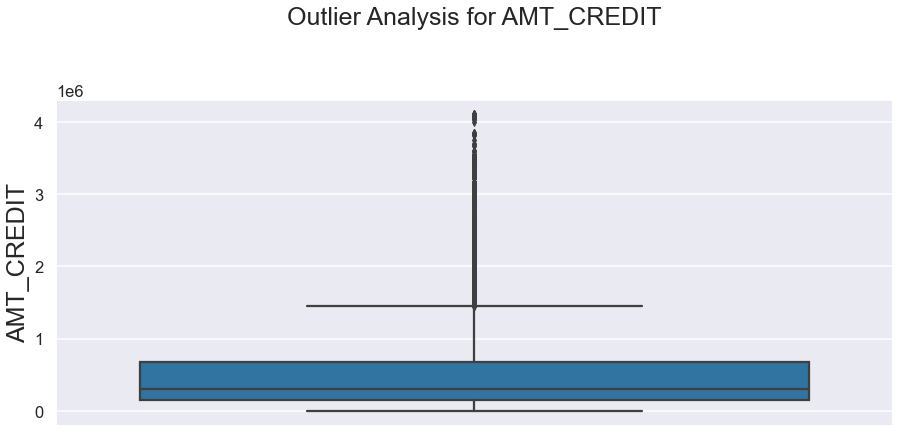

In [599]:
# AMT_CREDIT

plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for AMT_CREDIT')
sns.boxplot(data = previous_application_data,y='AMT_CREDIT')
plt.show()

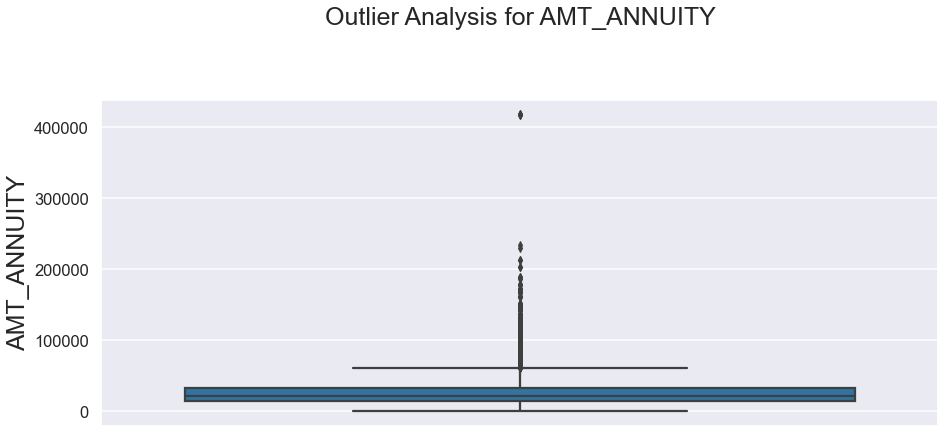

In [600]:
# AMT_ANNUITY

plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for AMT_ANNUITY')
sns.boxplot(data = previous_application_data,y='AMT_ANNUITY')
plt.show()

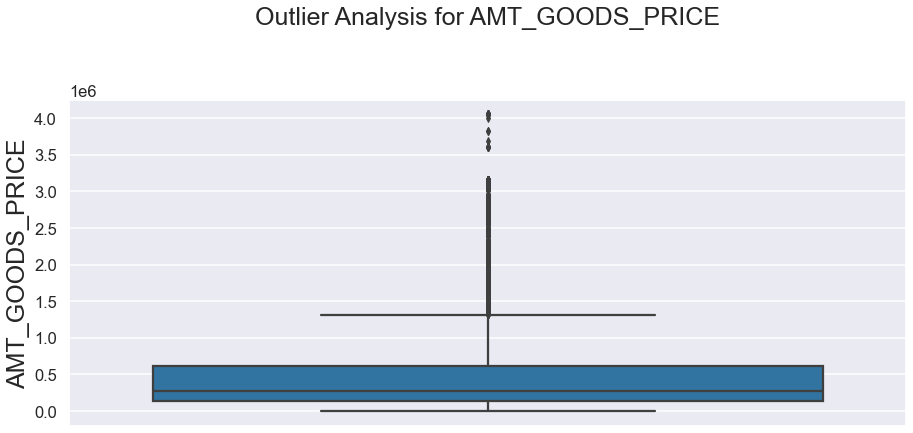

In [601]:
# AMT_GOODS_PRICE

plt.figure(figsize = (15,6))
plt.title('Outlier Analysis for AMT_GOODS_PRICE')
sns.boxplot(data = previous_application_data,y='AMT_GOODS_PRICE')
plt.show()

<b><font color = blue> Inference </font></b>: We can see there are outliers in the above plots.

In [602]:
previous_application_data[previous_application_data =='XNA'].count()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                        0
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_GOODS_PRICE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE               5416
CODE_REJECT_REASON               527
NAME_TYPE_SUITE                    0
NAME_CLIENT_TYPE                  53
NAME_GOODS_CATEGORY            69635
NAME_PORTFOLIO                   263
NAME_PRODUCT_TYPE                263
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY           63993
CNT_PAYMENT                        0
NAME_YIELD_GROUP                 263
PRODUCT_COMBINATION                0
D

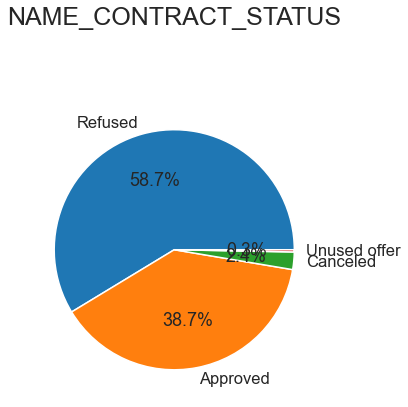

In [603]:
#name client type analysis through chart

client_type_labels = previous_application_data['NAME_CONTRACT_STATUS'].value_counts().index
fig, ax1 = plt.subplots(figsize = (10,6))
#colors1 = ( "#512D6D", "#DF711B", "#FF4848")
ax1.pie(previous_application_data['NAME_CONTRACT_STATUS'].value_counts(),labels=client_type_labels,autopct='%.1f%%')
plt.title('NAME_CONTRACT_STATUS')
plt.tight_layout()
plt.show()

<b><font color = blue> Inference </font></b>: For applicants there are refused percentage is 58.7%

### Merge the previous data with current data

In [604]:
#Merging it with current data

merged_data = pd.merge(left = current_application_data,right = previous_application_data,how='inner',on='SK_ID_CURR',suffixes="_x")


In [605]:
merged_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   51420 non-null  int64   
 1   TARGET                       51420 non-null  int64   
 2   NAME_CONTRACT_TYPE_          51420 non-null  object  
 3   CODE_GENDER                  51420 non-null  object  
 4   FLAG_OWN_CAR                 51420 non-null  object  
 5   FLAG_OWN_REALTY              51420 non-null  object  
 6   CNT_CHILDREN                 51420 non-null  int64   
 7   AMT_INCOME_TOTAL             51420 non-null  float64 
 8   AMT_CREDIT_                  51420 non-null  float64 
 9   AMT_ANNUITY_                 51420 non-null  float64 
 10  AMT_GOODS_PRICE_             51420 non-null  float64 
 11  NAME_TYPE_SUITE_             51420 non-null  object  
 12  NAME_INCOME_TYPE             51420 non-null  object  
 13  N

In [606]:
merged_data['NAME_CLIENT_TYPE'].value_counts()

Repeater     41657
New           7172
Refreshed     2553
XNA             38
Name: NAME_CLIENT_TYPE, dtype: int64

As XNA having 38 so we can add in majority volumn i.e. Repeaters

In [607]:
merged_data.loc[merged_data['NAME_CLIENT_TYPE']=='XNA','NAME_CLIENT_TYPE']='Repeater'

In [608]:
merged_data['NAME_CLIENT_TYPE'].value_counts()

Repeater     41695
New           7172
Refreshed     2553
Name: NAME_CLIENT_TYPE, dtype: int64

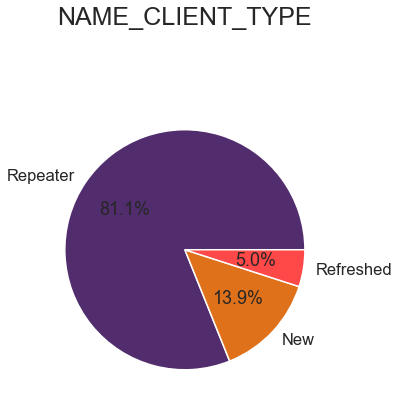

In [609]:
#name client type analysis through chart

client_type_labels = merged_data['NAME_CLIENT_TYPE'].value_counts().index
fig, ax1 = plt.subplots(figsize = (10,6))
colors1 = ( "#512D6D", "#DF711B", "#FF4848")
ax1.pie(merged_data['NAME_CLIENT_TYPE'].value_counts(),labels=client_type_labels,autopct='%.1f%%',colors=colors1)
plt.title('NAME_CLIENT_TYPE')
plt.tight_layout()
plt.show()

<b><font color = blue> Inference </font></b>: After merging the data sets, we can see most of the loan applicants are repeaters.

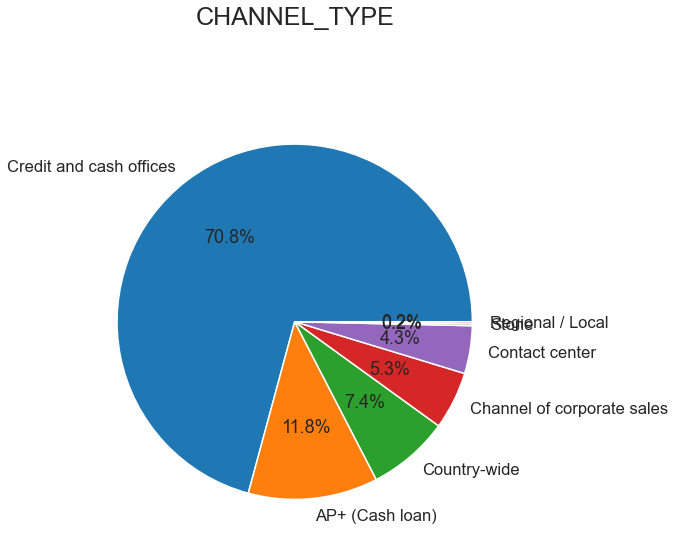

In [610]:
client_type_labels = merged_data['CHANNEL_TYPE'].value_counts().index
fig, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(merged_data['CHANNEL_TYPE'].value_counts(),labels=client_type_labels,autopct='%.1f%%')
plt.title('CHANNEL_TYPE')
plt.tight_layout()
plt.show()

<b><font color = blue> Inference </font></b>: We acquired the most of the client on the previous application through credit and cash offices.

In [611]:
previous_application_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        63835
XNA                                           5416
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

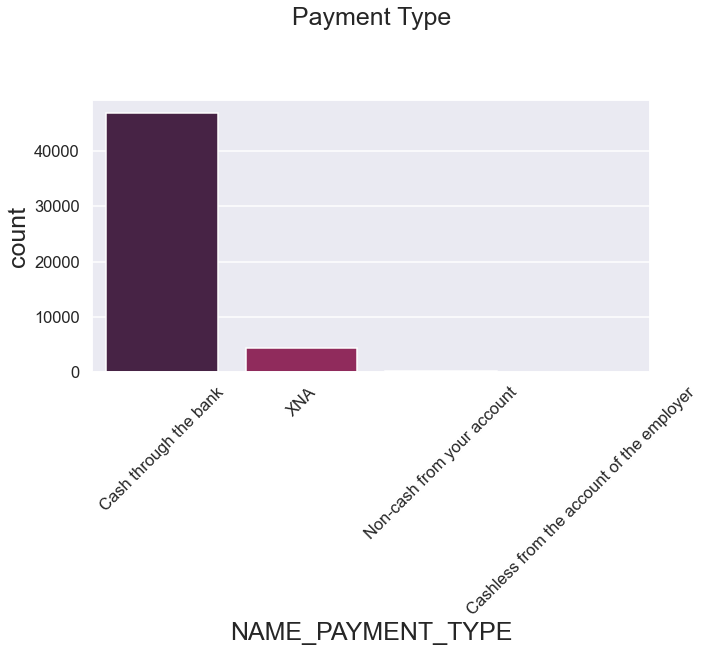

In [612]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)
plt.title("Payment Type")
sns.countplot(data=merged_data,x='NAME_PAYMENT_TYPE',order=merged_data['NAME_PAYMENT_TYPE'].value_counts().index,palette='rocket')
plt.show()

<b><font color = blue> Inference </font></b>: Count of applicants having payment through cash is more than that of other paayment types.

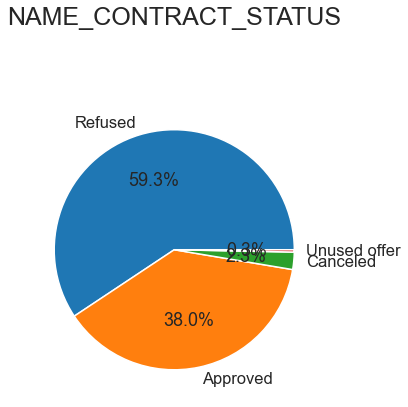

In [613]:
#name client type analysis through chart

client_type_labels = merged_data['NAME_CONTRACT_STATUS'].value_counts().index
fig, ax1 = plt.subplots(figsize = (10,6))
#colors1 = ( "#512D6D", "#DF711B", "#FF4848")
ax1.pie(merged_data['NAME_CONTRACT_STATUS'].value_counts(),labels=client_type_labels,autopct='%.1f%%')
plt.title('NAME_CONTRACT_STATUS')
plt.tight_layout()
plt.show()

<b><font color = blue> Inference </font></b>: Refused is the highest contract status.

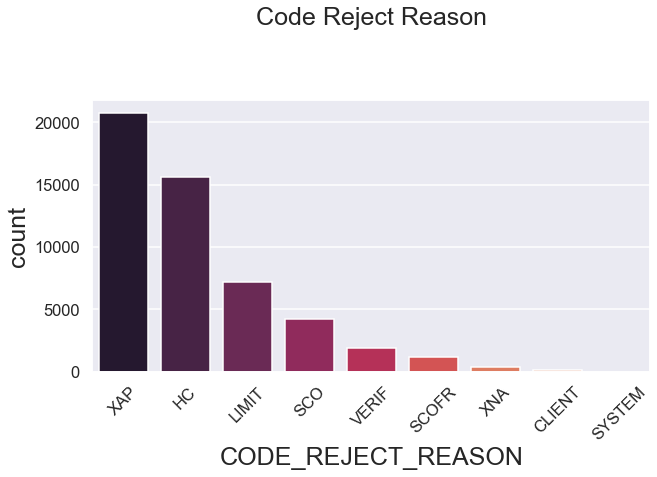

In [614]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)
plt.title("Code Reject Reason")
sns.countplot(data=merged_data,x='CODE_REJECT_REASON',order=merged_data['CODE_REJECT_REASON'].value_counts().index,palette='rocket')
plt.show()

<b><font color = blue> Inference </font></b>: For most of the applicants loan rejection reason is not specified.

In [615]:
merged_data['NAME_CONTRACT_STATUS'].value_counts()

Refused         30508
Approved        19553
Canceled         1199
Unused offer      160
Name: NAME_CONTRACT_STATUS, dtype: int64

In [616]:
merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE_',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_',
       'HOUR_APPR_PROCESS_START_', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_B

In [617]:
# dropped unwanted columns.
merged_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_STARTx', 'HOUR_APPR_PROCESS_STARTx','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [618]:
merged_data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_',
       'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE_',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_',
       'HOUR_APPR_PROCESS_START_', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPEx', 'AMT_ANNUITYx', 'AM

### Univariate analysis for merged data

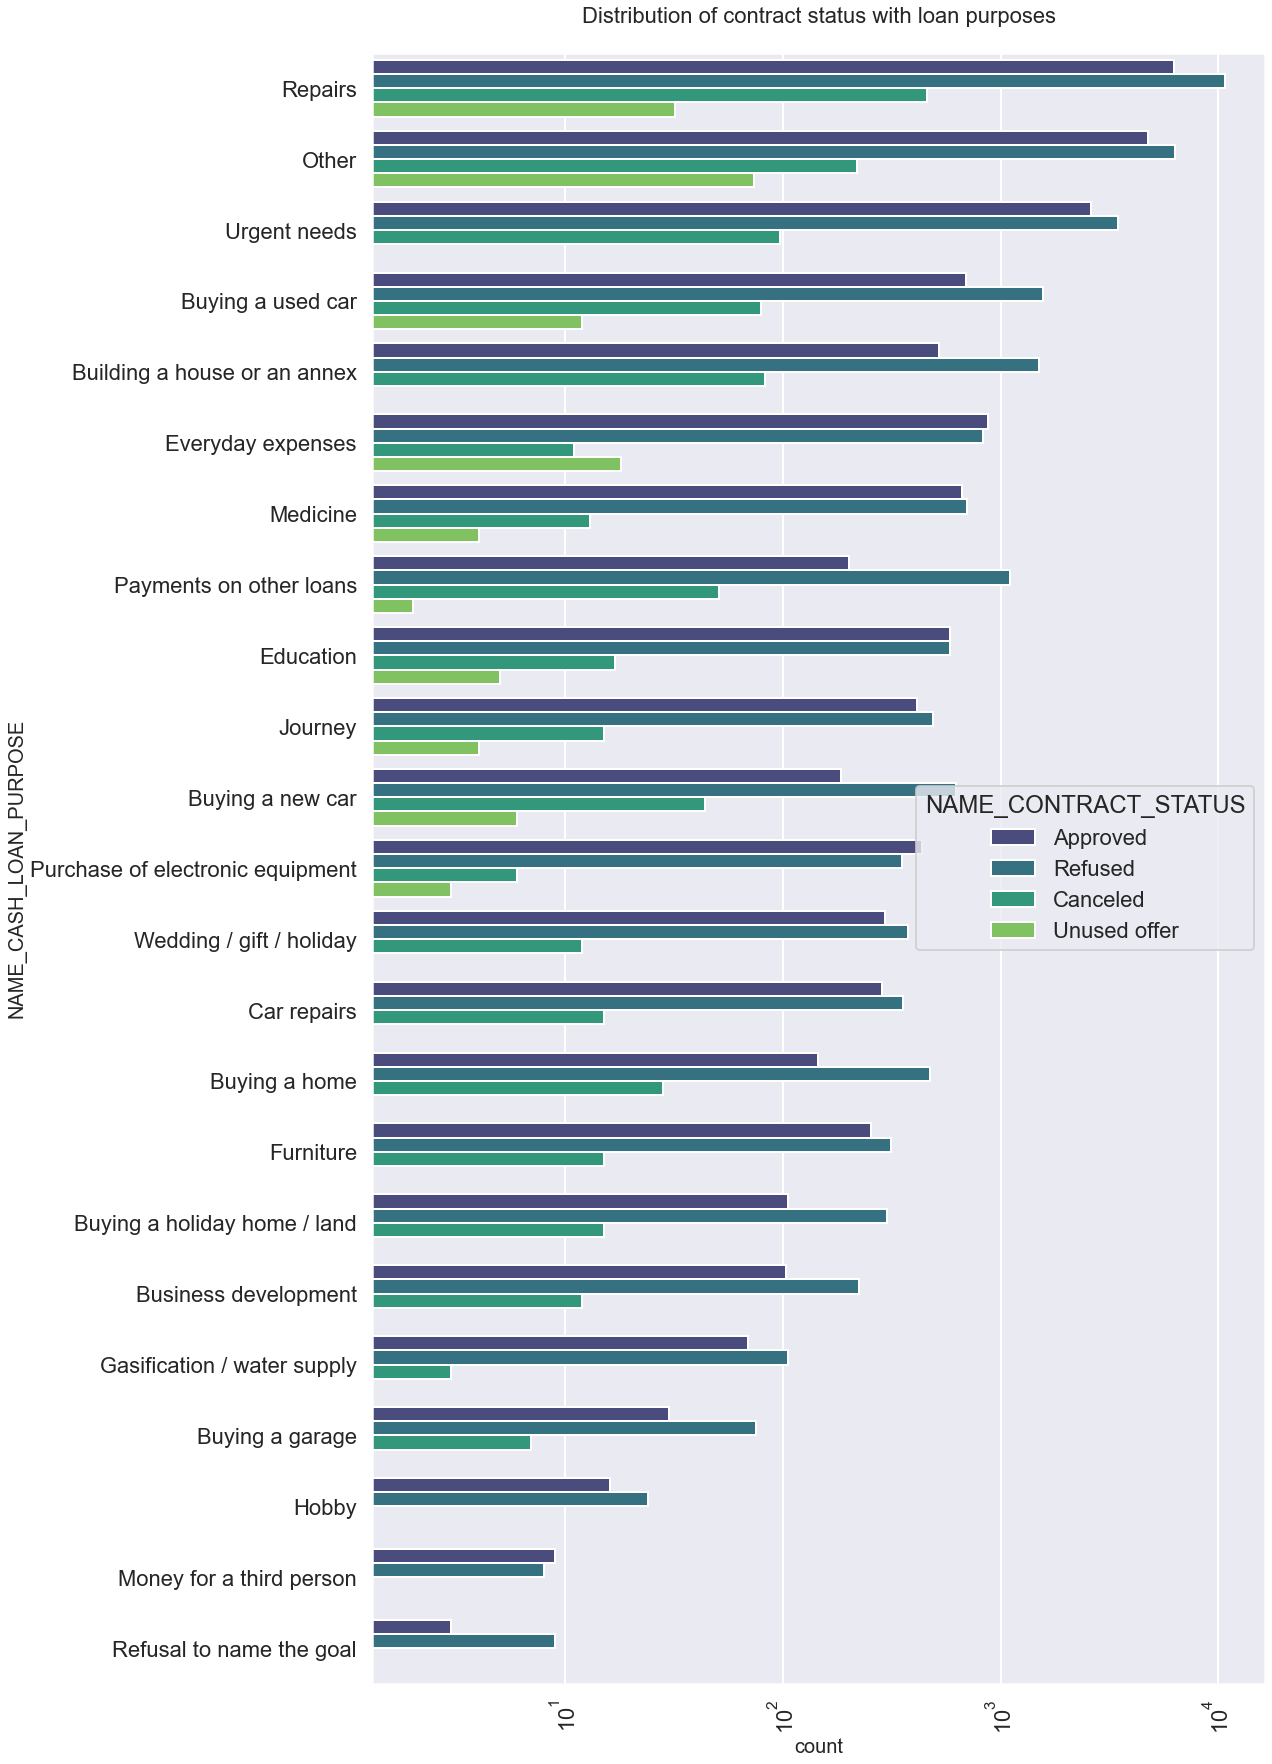

In [619]:
sns.set_style('darkgrid')
sns.set_context('poster')

plt.figure(figsize=(16,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='viridis')


<b><font color = blue> Inference </font></b>:1. The highest loans are refused for repairs loan purpose.
    2. Number of loan approved is more than number of loan refused for everyday expenses.

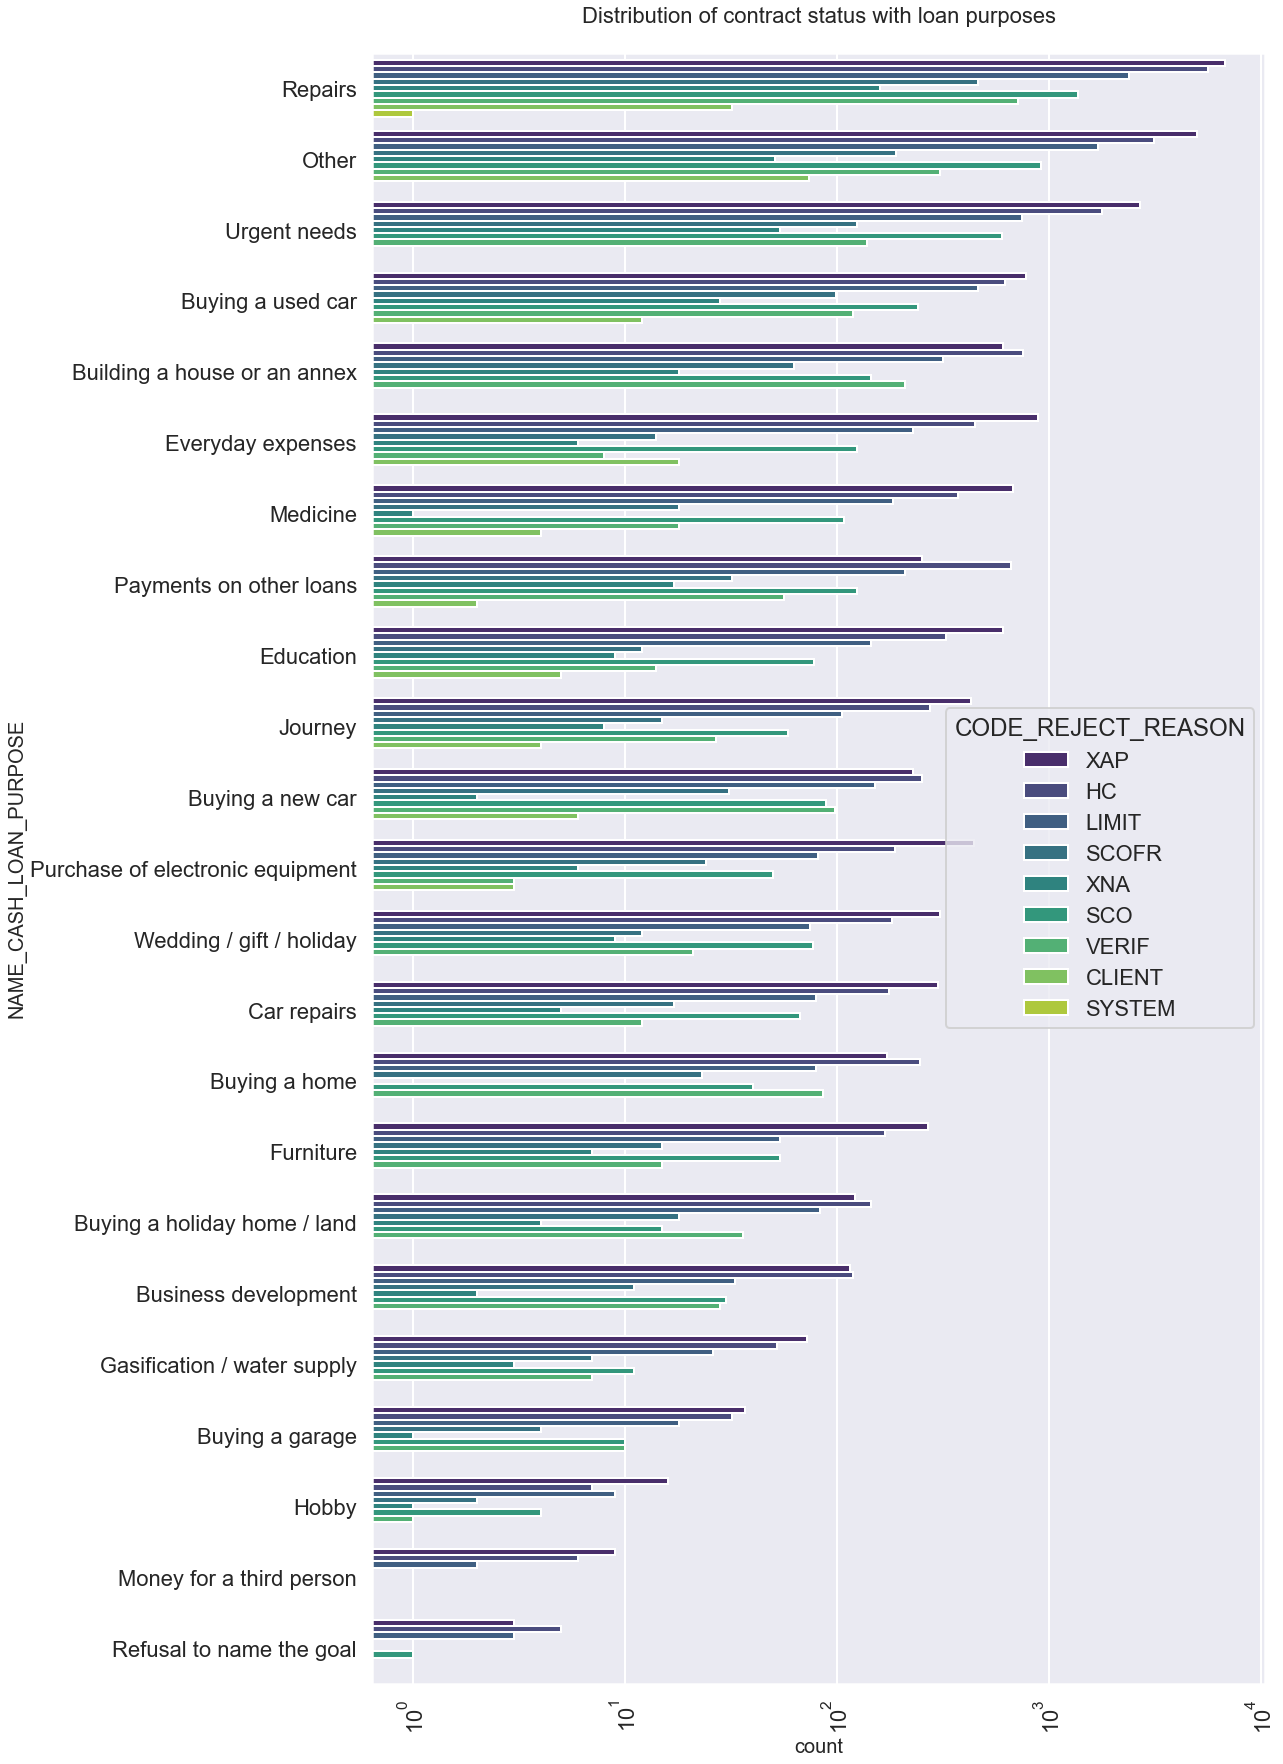

In [620]:
sns.set_style('darkgrid')
sns.set_context('poster')

plt.figure(figsize=(16,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'CODE_REJECT_REASON',palette='viridis')


<b><font color = blue> Inference </font></b>: Most of the loans are rejected for repairs purpose without specified reason.

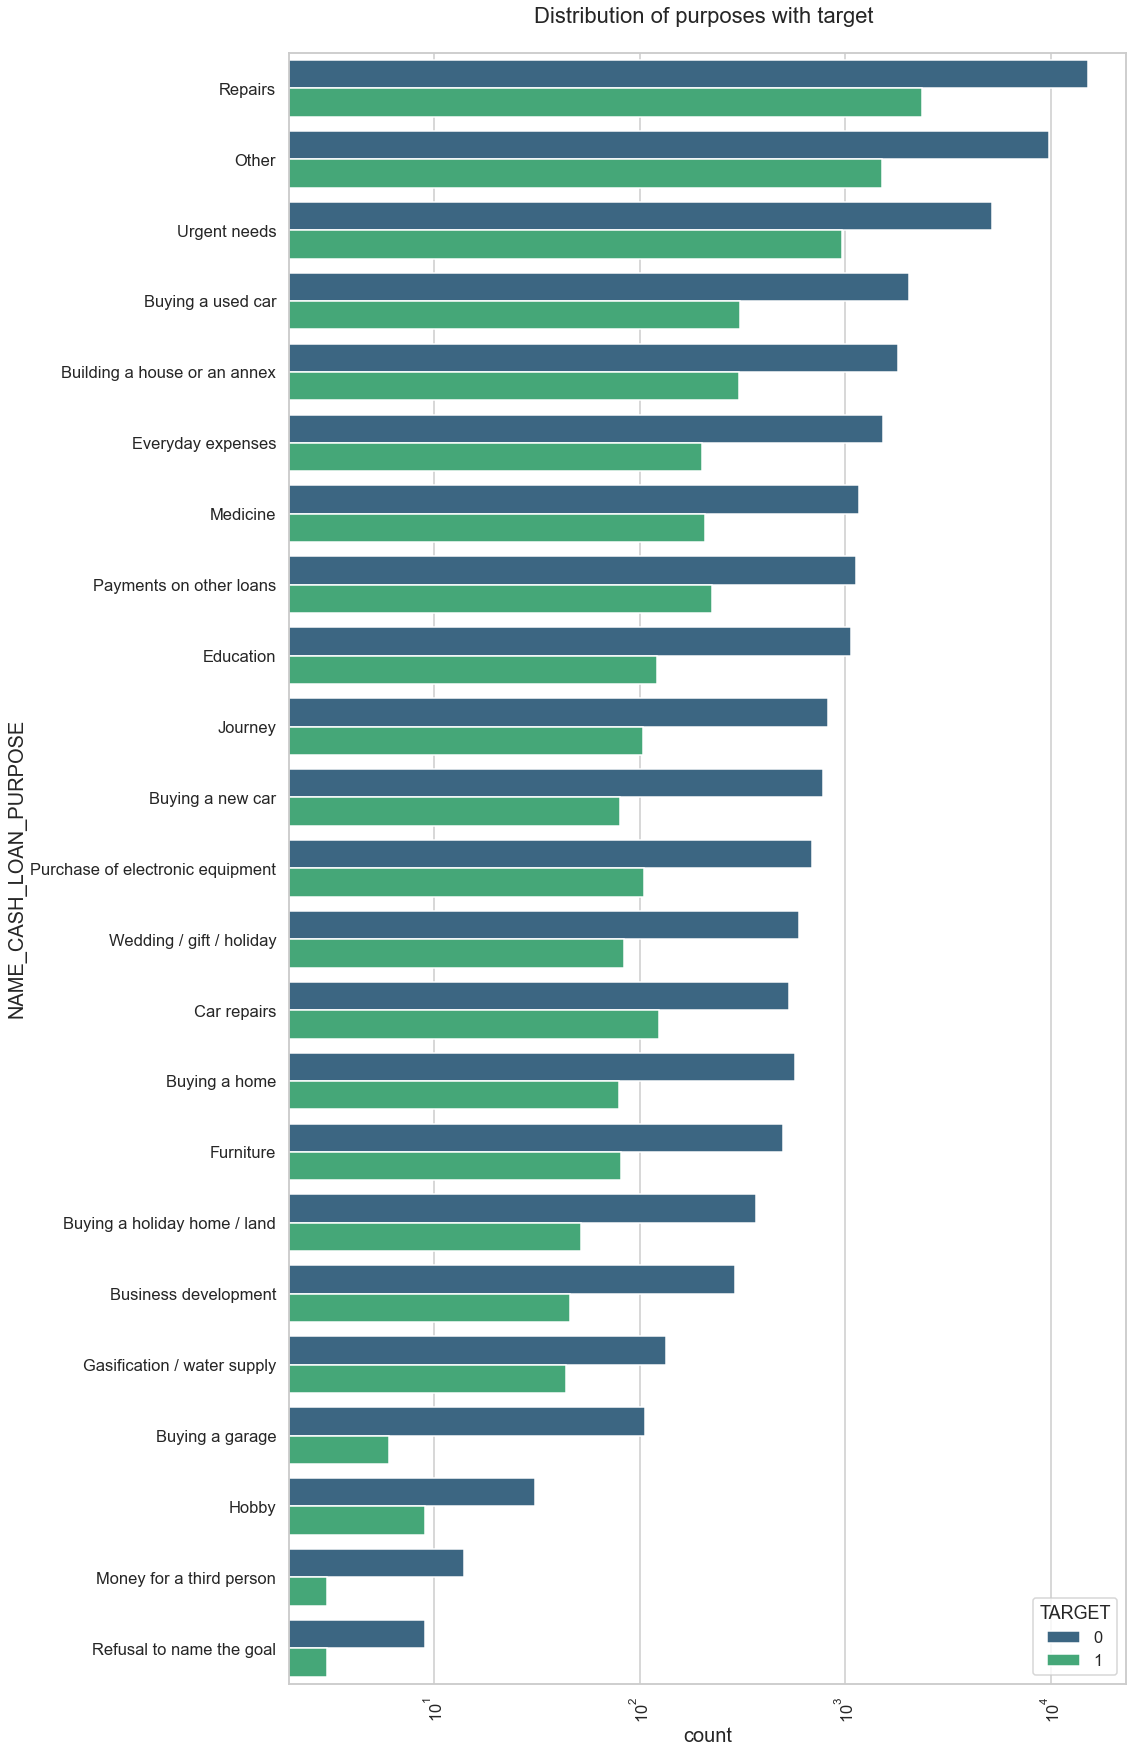

In [621]:
# Distribution of contract status with target
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='viridis')

<b><font color = blue> Inference </font></b>: The highest count of applicants who facing difficulties for loan taken for reparing purpose amoung all loan purposes.

### Bivariate Analysis

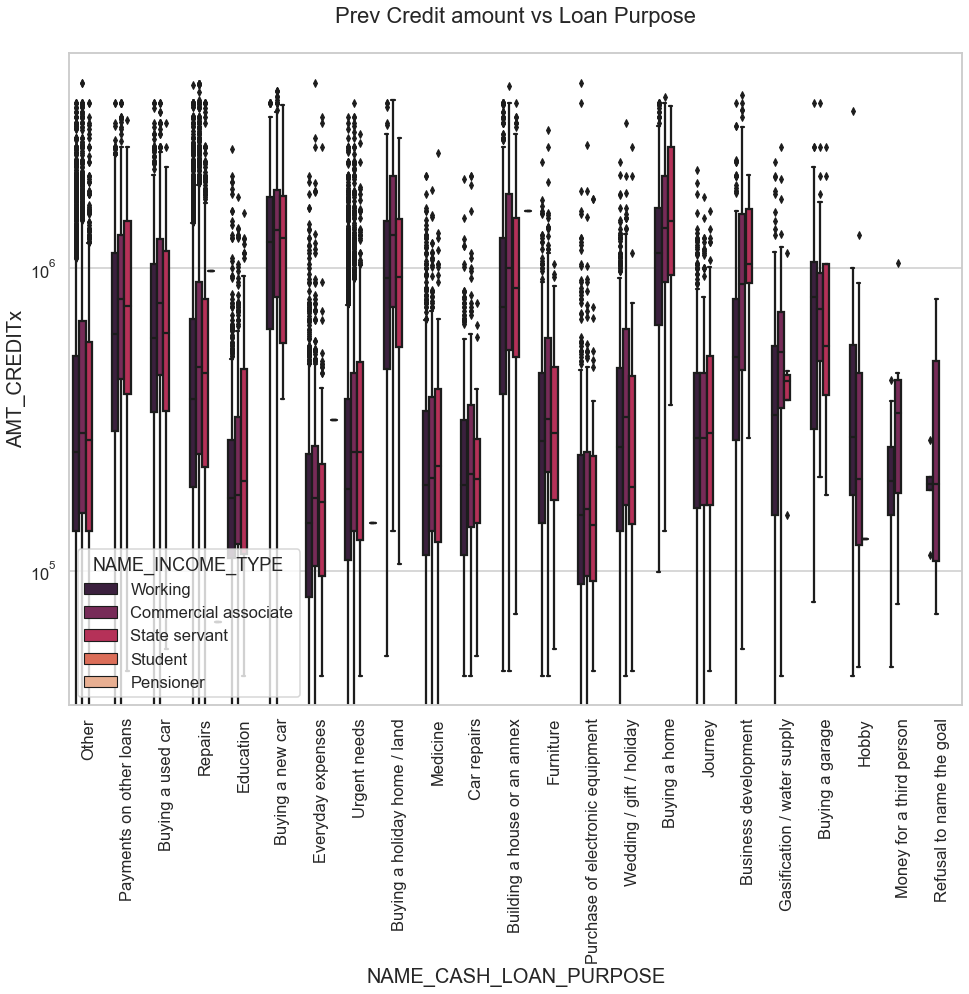

In [622]:
# Credit amount vs loan purpose

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merged_data, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITx',orient='v',palette='rocket')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()


<b><font color = blue> Inference </font></b>: There is highest loan amount credited for buying the home, land, car and building a house.
2. Income type of state servants have a significant amount of credit applied

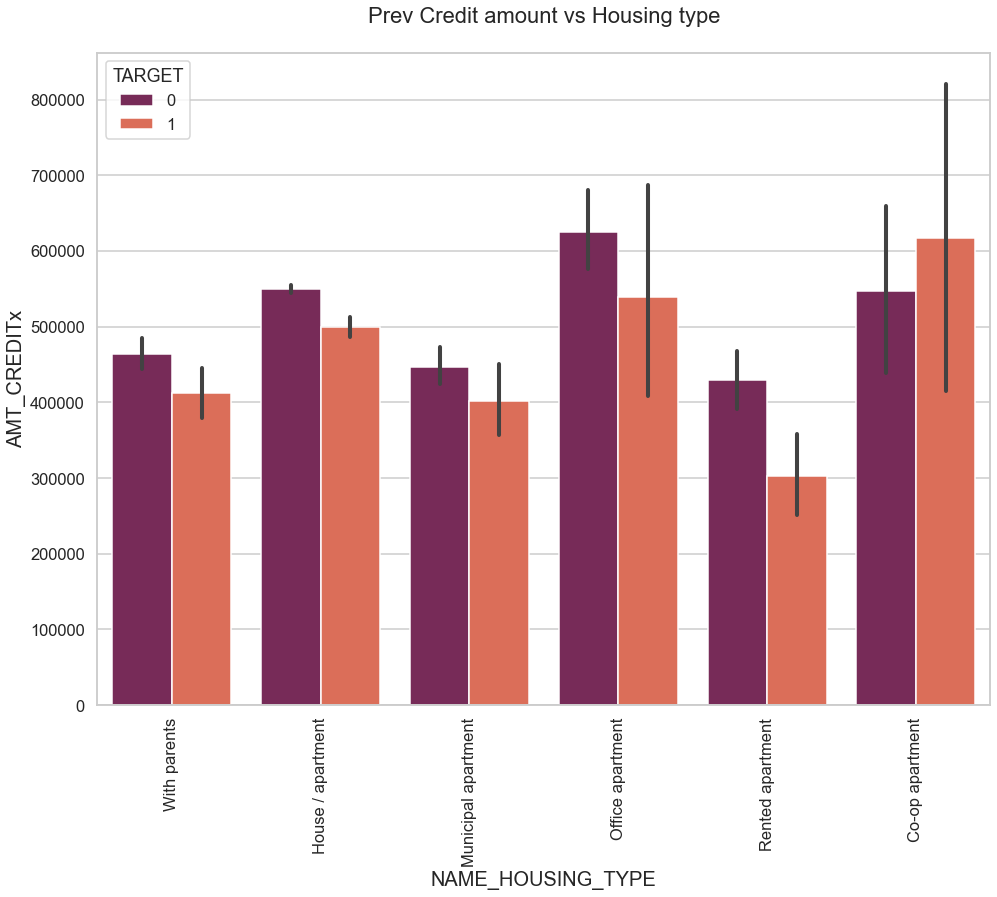

In [623]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merged_data, y='AMT_CREDITx',hue='TARGET',x='NAME_HOUSING_TYPE',palette='rocket')
plt.title('Prev Credit amount vs Housing type')
plt.show()

<b><font color = blue> Inference </font></b>: 1. Co-op apartments loan type applicants are facing problems with successfull payments.

<b> Summary </b>
Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.